### <u>Index:</u>
1. Contexte de l'étude
2. Import des packages Python et rechargement automatique des packages du projet
3. Chargement des données 'Training'
4. Description du data set case
  * a. Entrées
  * b. Sortie
  * c. Croisement Entées/Sortie
5. Exploration tabulaire des données:
  * a. Visualisation tabulaire des données - Affichage du type 'head()'
  * b. Rapport semantique des données - Affichage du type 'info()'
  * c. Données manquantes par type de 'feature'
  * d. Statistique descriptive
     * Nombre de features égales à Nulle (0)
     * Ratio d'observations ayant des features en outlier
     * Comparaison des valeurs statistiques entres le dataset initiale et le dataset dépourvu des outliers
  * e. Distribution du jeux des données:
6. Exploration graphique univariable des données:
  * a. Histogramme des features après gestion des valeurs manquantes 
     * Histogramme comparant la feature 'OP100_Capuchon_insertion_mesure' avant et après la gestions des valeurs manquantes
  * b. Histogramme des features après gestion des valeurs manquantes + application de 'RobustScaler'
  * c. Histogramme des features après gestion des valeurs manquantes + transformation 'log10'
  * d. Violon et boîte à moustaches des features avec gestion des valeurs manquantes
  * e. Violon et boîte à moustaches des features avec gestion des valeurs manquantes + application de 'RobustScaler'  
7. Exploration graphique bivariables 'feature/target' des données:
  * a. Matrice de correlation et heatmap après gestion des valeurs manquantes
  * b. Matrice de correlation et heatmap après gestion des valeurs manquantes et rescale
  * c. Nuage de points entre la 'target' et les autres 'features' 
8. Feature Engineering/Sélection et choix faits/Hypothèses choisies             ** **A FAIRE** **
9. Analyse de la target:
  * a. Vérification de l'équilibre des données
  * b. Distribution du dataset selon les classes de la target
  * c. Histogramme de distribution du dataset selon les classes de la target
10. Analyse de la target après un oversampling SMOTE  
  * a. Regénération SMOTE de la classe minoriataire de la target
  * b. Statistique descriptive du nouveau dataset
  * c. Nouvelle distribution équilibrée du nouveau dataset
  * d. Matrice de correlation et heatmap du nouveau dataset
  * e. Violon et boîte à moustaches des features du nouveau dataset
  * f. Ratio d'observations ayant des features en outlier du nouveau dataset
11. Modèle à base d'arbre : Balanced Random Forest Classifier                     ** **FAIT PARTIELLEMENT => A COMPLETER** **
12. Modèle à base de distance : SMOTE et Logistique regression                    ** **FAIT PARTIELLEMENT => A COMPLETER** **
13. Modèle à base de Réseau de Neuronne ou bien de Stacking (Ensemble learning)   ** **A FAIRE** **
14. Conclusions    ** **A FAIRE** **
15. Perspectives   ** **A FAIRE** **
16. Annexe: Code Python 


### <u>Récapitulatif du Reste à faire</u>
1. Feature engineering: **Point 7 de l'index ci dessus**
  * Appliquer une transformation log10 pour les features dont les distributions sont asymétriques
  * Enrichir les données avec l'horodatage d'assemblage en les extrayant de l'identifiant technique 'PROC_TRACEINFO'
  * Dans les histogrammes 7.c qui représentent la distribution des "features numériques" sur les 2 classes OK et KO, on constate que la classe minoritaire se retrouve délimité à l'intérieur d'une plage de valeurs pour certains features. (ex: OP070_V_1/2_angle_value, OP110_Vissage_M8_torque_Value).\
Pour cela, il faudrait vérifier l'impact si on transforme ces features numériques continues en des features catégoriques mettant en avant l'existence de la class minoritaire KO.
3. Compléter avec 3 classifieurs de type différents: à base d'arbre / à base de distance / à base de reseau de Neuronne ou bien de Stacking: **Points 11, 12, 13 de l'index ci dessus**
   * Pour chaque classifieur faire : TrainTestSplit / CV / SearhGridCV
   * Pour chaque classifieur: Analyse et interpretation des résultats (F1, Roc) / Graphe F1 et ROC \
   * **Si le temps le permet** alors faire pour chaque classifieur: Graphe Overfit Underfit / Graphe avec des valeurs differents des hyperparamètres.
6. Expliquer pourquoi une classification déséquilibrée pose un défi pour la modélisation prédictive. 
7. Identifier la/les motivations pour avoir une distribution Normale "bell shape". Citer les avantages d'une telle distribution.
10. Mise en forme selon les indications du document "DSSP14_Guidelines_Projet_Professionnel.doc"


### <u>Questions:</u>
1. Quand on a distribution asymétrique pour une feature et qu'on voudrait appliquer une transformation logarithmique pour s'approcher d'une distribtuion normale: 
   * Est ce qu'il vaut mieux appliquer la transfromation sur les features assymétriques ? Ou bien on peut l'appliquer sur la totalité des features de la dataframe (ça nous évite de choisir une-par-une les features à transformer) 
   * Cette transformation sera appliquer sur le TrainSet; Est ce qu'il faut l'appliquer aussi sur le TestSet au moment de la prédiction ?

2. Les opérations d'imputations(ex: IterativeImputer) et de scaling (ex: RobustScaling) sont appliquées sur le TrainSet afin d'honorer les pré-requis d'apprentissage de certains algorihtmes de machine learning.\
Qstion: Est ce que la prediction sur une observation (TestSet) fonctionnera correctement au cas ou * **l'observation** * pour laquelle on effectue la prédiction:
   * possède une feature en "missing values" ?
   * ou bien si les features de l'observation ne sont pas scalés selon l'attente de l'algon en phase d'apprentissage ?

3. Quand on représente Si un feature est représenté par une distribution p
11. Est ce qu'il faut commenter davantage les graphes et les nombres ?
12. Est ce qu'il faut s'occuper de redimensionner les graphes de manières à ce que les libellés deviennent visibles ?\
Ou bien, ils seront consultés par support electronique (pdf, doc, projection, ...) et par conséquent ils peuvent être aggrandis électroniquement ?
  


## 1 - Contexte de l'étude

L'étude correspond à un 'Challenge Data ENS' qui a pour objectif de prévoir les défauts sur les lignes de production des démarreurs de l'équimentier Valeo.\
Lors de l'assemblage des démarreurs sur la ligne de production, des différents valeurs (couples, angles ...) sont mesurées sur les différentes stations de montage.

En fin de ligne, des mesures supplémentaires sont effectuées sur deux bancs de test afin d'isoler les défauts. Par conséquent, les échantillons sont étiquetés "OK" ou "KO". L'objectif est de concevoir un modèle qui pourrait identifier de tels défauts avant l'étape du banc d'essai.

L'étude concerne la classification des données déséquilibrée avec des valeurs de données manquantes. C'est un problème classique dans l'industrie et dans bien d'autres domaines : détection de fraude, détection de spam, domaine médical, ....

Les classifications déséquilibrées posent un défi pour la modélisation prédictive. La classe minoritaire est plus importante et donc le problème est plus sensible aux erreurs de classification pour la classe minoritaire que pour la classe majoritaire.


## 2 - Import des packages et rechargement automatique des packages du projets

In [34]:

import os
import sys
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from imblearn.ensemble import BalancedBaggingClassifier, RUSBoostClassifier, BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE
from imblearn.over_sampling.base import BaseOverSampler
from imblearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import HistGradientBoostingClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model._stochastic_gradient import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

import xgboost as xgb

# Import "valeo" module
sys.path.append("..")
from valeo.infrastructure.LogManager import LogManager as lm
# NB: Initializing logger here allows "class loaders of application classes" to benefit from the global initialization
logger = lm().logger(__name__)  
from valeo.infrastructure import Const 
from valeo.infrastructure.tools.DfUtil import DfUtil
from valeo.infrastructure.tools.ImgUtil import ImgUtil
from valeo.infrastructure.XY_Loader import XY_Loader
from valeo.infrastructure.XY_metadata import XY_metadata as XY_metadata
from valeo.domain.ValeoModeler import ValeoModeler
from valeo.domain.ValeoPredictor import ValeoPredictor
import valeo.infrastructure.Transformer as transf



# Notebook automatic reload
%load_ext autoreload
%reload_ext autoreload
%aimport valeo.infrastructure.Transformer 
%aimport valeo.infrastructure.LogManager
%aimport valeo.infrastructure.Const
%aimport valeo.infrastructure.tools.DfUtil
%aimport valeo.infrastructure.tools.ImgUtil
%aimport valeo.infrastructure.XY_Loader
%aimport valeo.infrastructure.XY_metadata
%aimport valeo.domain.ValeoModeler
%aimport valeo.domain.ValeoPredictor


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3 - Description du data set case

#### <u>a - Entrées:</u>
Les caractéristiques d'entrée sont des mesures collectées sur différentes stations d'assemblage 
avec des capteurs connectés à des contrôleurs logiques programmables qui les stockent tous. 

On distingue par exemple:\
<img src="./features.png">


#### <u>b - Sortie:</u>
Il s'agit de la valeur de résultat de l'OP130, banc d'essai: Binar OP130_Resultat_Global_v. \
La valeur 0 est affectée aux échantillons OK (réussie) et la valeur 1 est affectée aux échantillons KO (échoué).\
Il s'agit du résultat combiné de multiples tests électriques, acoustiques et vibro-acoustiques.

<img src="./01_Chaine-de-production-medium.png">


\
L'objectif est de trouver la meilleure prédiction: Sortie = f (entrées).\
L'ensemble de données contient 34515 échantillons d'apprentissage et 8001 échantillons de test.

#### <u>c - Croisement Entées/Sortie:</u>
Les données de training sont réparties dans 2 fichiers csv:\
[project-root]/data/train/traininginputs.csv\
[project-root]/data/train/trainingoutput.csv \

Un identifiant technique 'PROC_TRACEINFO' permet de croiser le fichier d'entrée au fichier de sortie.\
C'est un code unique donné attribué au démarreur assemblé. Exemple: I-B-XA1207672-190701-00494.
\
XA1207672 est la référence.\
190701 est la date: ici le 01 juillet de l'année 2019.\
00494 est le code unique donné au produit, ce nombre est augmenté de 1 chaque fois que nous traitons un nouveau produit.\
\
On dispose aussi des données d'entrée de test: [project-root]/data/test/testinputs.csv\
Les données de sortie de test sont générés par l'étude et sont uploader sur la platforme 'Data Challenge ENS' https://challengedata.ens.fr/participants/challenges/36/




## 4 - Chargement des données 'Training'

In [35]:
data = DfUtil.read_csv([Const.rootDataTrain() , "traininginputs.csv"])
Y_data = DfUtil.read_csv([Const.rootDataTrain(), "trainingoutput.csv"])


## 5 - Exploration et analyse tabulaire des données
#### <u>a - Visualisation tabulaire des données - Affichage du type 'head()'</u>:

In [36]:
data.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61


Un simple affichage du type 'head()' permet de voir à quoi ressemble les données.

####  <u>b - Rapport semantique des données - Affichage du type 'info()'</u>:

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

Un affichage sémantique du type 'info()' met en évidence le type des données et le nombre des valeurs manquantes 'missing values'.

On constate que:
  * Toutes les features sont numériques et continues, pas de features catégoriques
  * Plus de la moitié des valeurs de la feature 7 ' OP100_Capuchon_insertion_mesure' sont manquants\
  => Cette feature doit être traitée en lui imputant des valeurs. Un imputer de type IterativeImputer(stratégie 'médiane') ser a utilisé.
  * PROC_TRACEINFO de type object (=> String), c'est l'identifiant de ligne permettant de croiser les 'features' avec la 'target'. Cette feature porte l'horodatage de l'assemblage des démarreurs, la date sous jacente sera extraite et utilisée dans la phase de 'features engineering'

####  <u>c - Données manquantes par type de 'feature'</u>:

In [38]:
data.isna().sum()

PROC_TRACEINFO                         0
OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
dtype: int64

L'identifiant 'PROC_TRACEINFO' est supprimé **provisoirement** de l'ensemble des features:

In [39]:
X_data = data.drop(columns = "PROC_TRACEINFO")
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 7   OP120_Rodage_U_mesure_value      34515 non-null  float64
 8   OP070_V_1_torque_value           34515 non-null  float64
 9   OP090_StartLinePeakForce_value   34515 non-null  float64
 10  OP110_Vissage_M8_angle_value     34515 non-null  float64
 11  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 12  OP070_V_2_torque_v

####  <u>d - Statistique descriptive</u>

In [40]:
X_data.sort_index(axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OP070_V_1_angle_value,34515.0,159.906922,15.662650,101.80,148.70,158.00,169.30,198.30
OP070_V_1_torque_value,34515.0,6.548403,0.097602,5.67,6.41,6.61,6.62,6.67
OP070_V_2_angle_value,34515.0,159.618236,15.091490,82.00,149.40,158.70,168.90,198.10
OP070_V_2_torque_value,34515.0,6.550867,0.094814,5.74,6.42,6.61,6.61,6.67
OP090_SnapRingFinalStroke_value,34515.0,11.970190,0.169873,0.00,11.85,12.04,12.08,12.19
OP090_SnapRingMidPointForce_val,34515.0,97.700978,6.837714,0.00,94.31,98.50,102.23,127.30
OP090_SnapRingPeakForce_value,34515.0,156.915055,11.271492,0.00,149.21,156.18,164.38,196.92
OP090_StartLinePeakForce_value,34515.0,23.630152,2.546341,0.00,22.28,23.88,25.29,43.41
OP100_Capuchon_insertion_mesure,15888.0,0.388173,0.024425,0.24,0.38,0.39,0.41,0.42
OP110_Vissage_M8_angle_value,34515.0,17.878398,6.785079,6.30,13.50,16.40,20.20,84.60


On constate que :
- OP070_V_2_angle_value          : Outlier côté Min => Utiliser un 'robust scaler' pour réduire l'effet Outlier

- OP090_StartLinePeakForce_value, OP090_SnapRingMidPointForce_val, OP090_SnapRingPeakForce_value, OP090_SnapRingFinalStroke_value : \
Identification de valeurs nulle, 'min' égal à 0.\
Normalement ces mesures physiques ne doivent pas être nulle, le fait qu'elles soient nulles laisse penser qu'elles sont nulles à tort et par conséquent il faut les considerer comme des valeurs manquantes et seront traitées dans la phase **'Feature Engineering'**
- OP090_StartLinePeakForce_value : Outlier côté Max => Utiliser un 'robust scaler'
- OP110_Vissage_M8_angle_value   : Outlier côté Max => Utiliser un 'robust scaler'
- OP110_Vissage_M8_torque_value  : Presque Constant
- OP100_Capuchon_insertion_mesure: Plus de la moitié sans valeurs => Utiliser 'missing values' Imputer
- OP120_Rodage_U_mesure_value    : Très petite variance
- OP120_Rodage_I_mesure_value    : Outlier cote Max (=> Utiliser un 'robust scaler') + petite variance


###### <u>Nombre de features égales à Nulle:</u>

In [41]:
data.query('OP090_StartLinePeakForce_value == 0 or OP090_SnapRingMidPointForce_val == 0 or \
            OP090_SnapRingPeakForce_value == 0 or OP090_SnapRingFinalStroke_value == 0')

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
549,I-B-XA1207672-190907-01953,137.4,0.0,166.7,105.51,0.0,12.22,0.41,11.97,6.43,0.0,20.6,0.0,6.40
1651,I-B-XA1207672-190821-01367,178.7,0.0,170.4,112.95,0.0,12.33,0.39,11.97,6.61,0.0,12.8,0.0,6.61
22483,I-B-XA1207672-190424-02168,166.4,0.0,171.5,117.26,0.0,12.16,NaN,11.97,6.62,0.0,13.3,0.0,6.61


Seulement 3 observations dont les valeurs des features sont égales à 0.\
A cela s'ajoute la moité des valeurs de 'OP100_Capuchon_insertion_mesure' qui sont manquantes.

######  <u>Ratio d'observations ayant des features en outlier<u>:

In [42]:
Q1 = X_data.quantile(0.25)
Q3 = X_data.quantile(0.75)
IQR = Q3 - Q1
#
outliers = ((X_data < (Q1 - 1.5 * IQR)) |(X_data > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Le ratio d'outlier est de {len(X_data[outliers].index)/len(X_data.index)}")

Le ratio d'outlier est de 0.24256120527306968


Un ratio élevé => L'éventualité de supprimer les observations n'est pas viable.\
D'ailleurs, comme on ne connait pas la raison de ces outliers:
  * Est ce que c'est une erreur 
  * Ou bien c'est une vrai donnée dont le pattern est différent

Pour limiter l effet des outliers:
  * Utliser un modèle resistant aux outliers, comme les arbres
  * Tranformer les données en utilisant la fonction Log
Lors de la visualisation graphique des données on va retrouver des distributions biaisée (skewed)

######  <u>Comparaison des valeurs statistiques entres le dataset initiale et le dataset dépourvu des outliers</u>

In [43]:
# 1 - Le dataset dépourvu des outliers
X_data_out = X_data[~outliers]

# 2 - Creéer les 2 dataframes des valeurs statistique descriptive
Xt =  X_data.sort_index(axis=1).describe().transpose()
Xt_out =  X_data_out.sort_index(axis=1).describe().transpose()

# 3 - Fusionner les afin de pouvoir les comparer
xt_merged = pd.merge(left=Xt, right=Xt_out, how='inner', left_on=Xt.index, right_on=Xt_out.index, suffixes=('','-o'))
xt_merged = xt_merged.set_index(['key_0'])
xt_merged.sort_index(axis=1)

,25%,25%-o,50%,50%-o,75%,75%-o,count,count-o,max,max-o,mean,mean-o,min,min-o,std,std-o
key_0,,,,,,,,,,,,,,,,
OP070_V_1_angle_value,148.70,148.80,158.00,158.30,169.30,169.700,34515.0,26143.0,198.30,198.20,159.906922,160.147298,101.80,118.00,15.662650,1.561998e+01
OP070_V_1_torque_value,6.41,6.41,6.61,6.61,6.62,6.620,34515.0,26143.0,6.67,6.67,6.548403,6.547524,5.67,6.10,0.097602,9.687328e-02
OP070_V_2_angle_value,149.40,149.60,158.70,158.80,168.90,169.100,34515.0,26143.0,198.10,197.90,159.618236,159.847145,82.00,120.20,15.091490,1.497825e+01
OP070_V_2_torque_value,6.42,6.42,6.61,6.61,6.61,6.610,34515.0,26143.0,6.67,6.67,6.550867,6.549834,5.74,6.15,0.094814,9.459255e-02
OP090_SnapRingFinalStroke_value,11.85,11.85,12.04,12.04,12.08,12.080,34515.0,26143.0,12.19,12.19,11.970190,11.967375,0.00,11.67,0.169873,1.257830e-01
OP090_SnapRingMidPointForce_val,94.31,94.91,98.50,98.82,102.23,102.365,34515.0,26143.0,127.30,114.10,97.700978,98.384817,0.00,82.43,6.837714,5.792290e+00
OP090_SnapRingPeakForce_value,149.21,149.29,156.18,156.06,164.38,163.990,34515.0,26143.0,196.92,186.87,156.915055,156.769002,0.00,126.52,11.271492,1.104504e+01
OP090_StartLinePeakForce_value,22.28,22.43,23.88,23.91,25.29,25.300,34515.0,26143.0,43.41,29.80,23.630152,23.789862,0.00,17.77,2.546341,2.186637e+00
OP100_Capuchon_insertion_mesure,0.38,0.38,0.39,0.40,0.41,0.410,15888.0,12028.0,0.42,0.42,0.388173,0.392272,0.24,0.34,0.024425,1.951393e-02


D'une manière générale, les valeurs sont approximativement similaires, sauf pour le 'max' et le 'std' de quelques features:
- OP090_StartLinePeakForce_value, OP110_Vissage_M8_angle_value, OP120_Rodage_I_mesure_value: Le 'max' a chuté considérablement
- OP110_Vissage_M8_angle_value : Variance considérablement plus petite

#### <u>e - Distribution du jeux des données:</u>

In [44]:
starter_count = len(Y_data[Const.Binar_OP130_Resultat_Global_v])
starter_count_ok = Y_data[Const.Binar_OP130_Resultat_Global_v].value_counts()[0]
starter_count_ko = Y_data[Const.Binar_OP130_Resultat_Global_v].value_counts()[1]
# 
print(f'Nombre total des démarreurs : {starter_count}')
print(f'Nombre total des démarreurs OK => Nombre de Classes Negatives : {starter_count_ok} soit {round(starter_count_ok/starter_count * 100,2)} % du dataset')
print(f'Nombre total des démarreurs KO => Nombre de Classes Positives : {starter_count_ko} soit {round(starter_count_ko/starter_count * 100,2)} % du dataset')

Nombre total des démarreurs : 34515
Nombre total des démarreurs OK => Nombre de Classes Negatives : 34210 soit 99.12 % du dataset
Nombre total des démarreurs KO => Nombre de Classes Positives : 305 soit 0.88 % du dataset


L'étude concerne la classification des données déséquilibrée avec des valeurs de données manquantes. C'est un problème classique dans l'industrie et dans bien d'autres domaines : détection de fraude, détection de spam, domaine médical, ....

On constate qu'on est sur une classifications déséquilibrée dans la répartition ce qui pose un défi pour la modélisation prédictive. La classe minoritaire est plus importante et donc le problème est plus sensible aux erreurs de classification pour la classe minoritaire que pour la classe majoritaire.

## 6 - Exploration graphique univariable des données

#### <u>a - Histogramme des features après gestion des valeurs manquantes</u>:

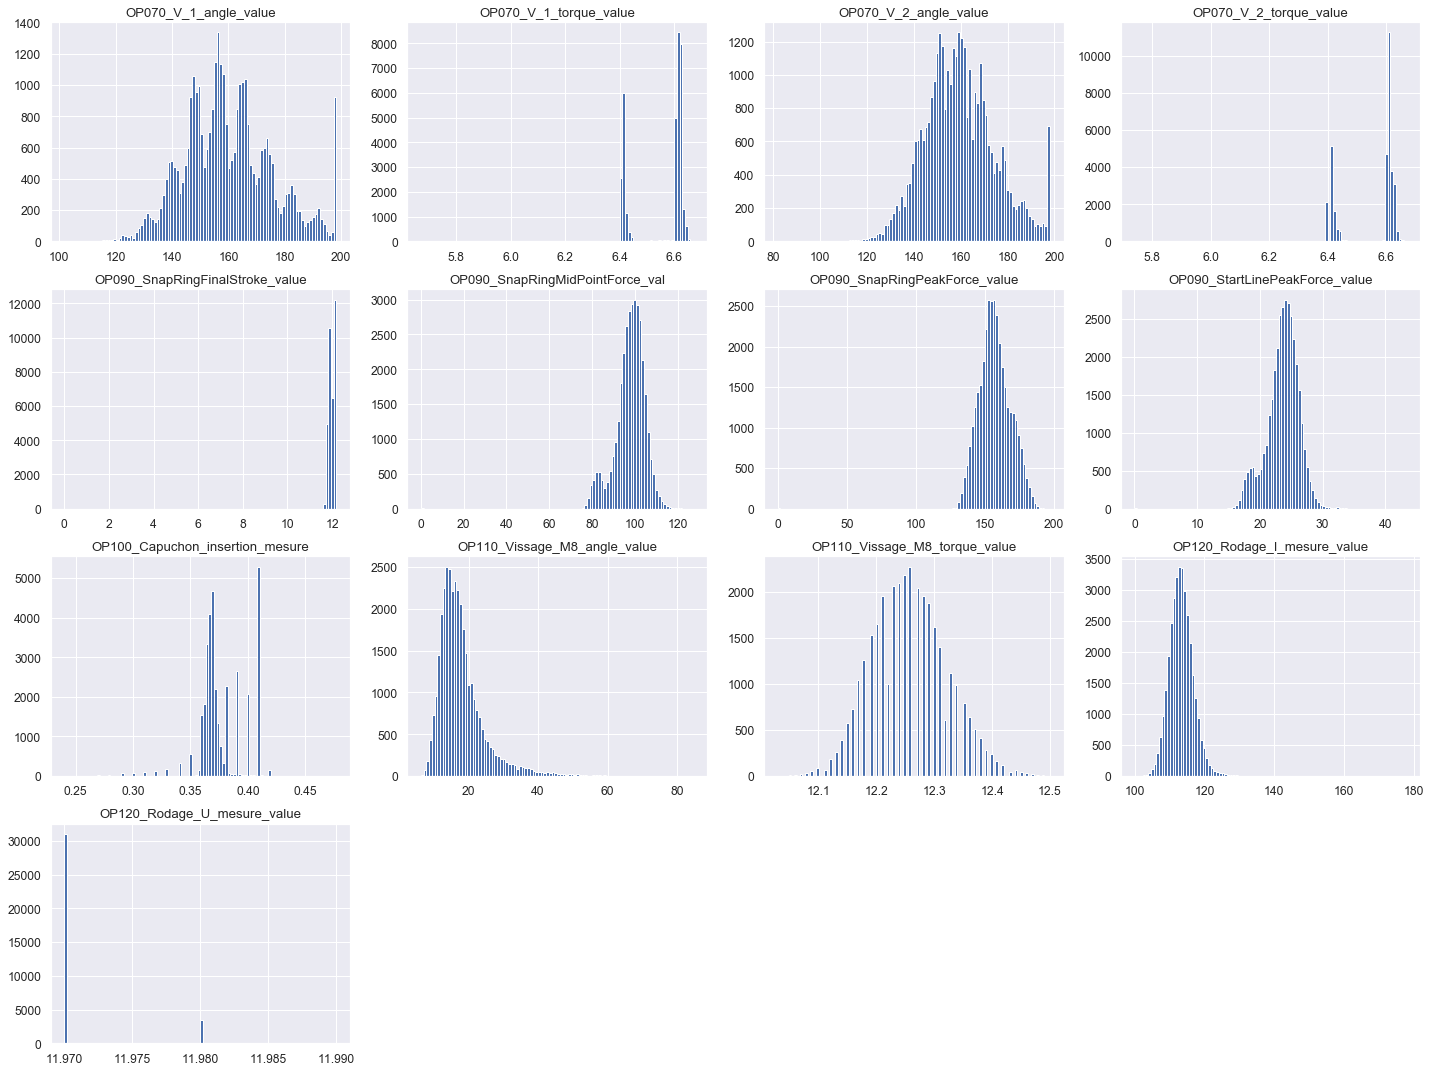

In [45]:
tsf = transf.Transformer()
X_data_transformed = tsf.iterative_imputer_transform(X_data)
ImgUtil.save_df_hist_plot(X_data_transformed,"X_data_imputed",figsize=(20,15), bins=100)
plt.show()

###### NB: 
tsf.iterative_imputer_transform(X_data) méthode de la classe 'Transformer' du module Python valeo.infrastructure.Transformer.\
Elle applique un imputer du type IterativeImputer(estimator=BayesianRidge, missing_values, initial_strategy = 'median')

En observant les graphes des différents features, on constate:
  * La plupart des distributions sont asymétriques notamment pour: (=> Appliquer une transformation logarithmique dans l'étape F.Engin.)
      * OP070_V_1_angle_value
      * OP090_SnapRingMidPointForce_val
      * OP090_SnapLinePeakForce_value
      * OP100_Capuchon_insertion_mesure  # feature dont la moitié des mesures n'existait pas 
      * OP110_Vissage_M8_angle_value
      
  * Une valeur de plafonnement (capping value) pour:
      * OP070_V_1_angle_value 
      * OP070_V_2_angle_value 

  * Les distributions suivantes représentes 2 catégories d'observations indépendantes: (=> Représenter chaque feature par 2 catégories dans l'étape F.Engin.):
      * OP070_V_1_torque_value 
      * OP070_V_2_torque_value 
      * OP120_Rodage_U_mesure_value


######  <u>Histogramme comparant la feature 'OP100_Capuchon_insertion_mesure' avant et après la gestions des valeurs manquantes:</u>

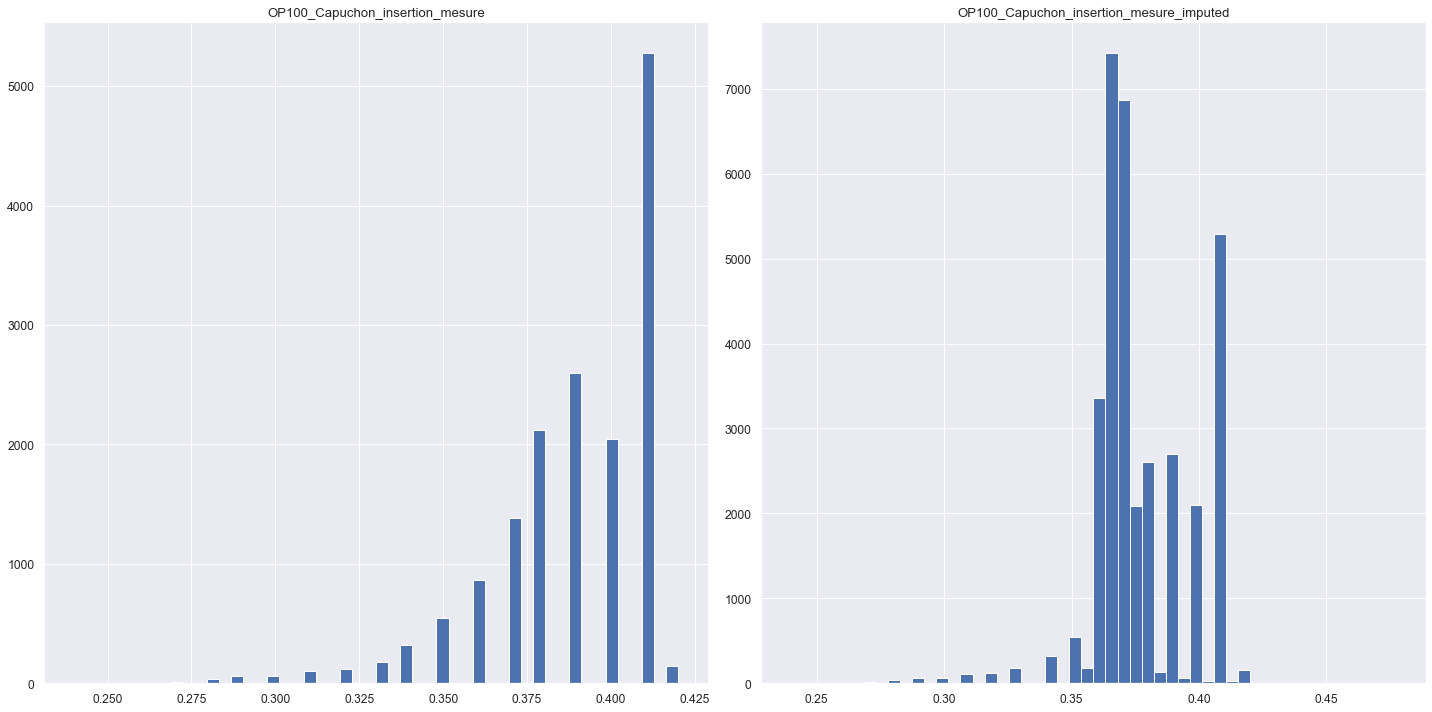

In [46]:
dff_ = pd.DataFrame(X_data[Const.OP100_Capuchon_insertion_mesure])
dff_[Const.OP100_Capuchon_insertion_mesure + "_imputed"] = X_data_transformed[Const.OP100_Capuchon_insertion_mesure]
ImgUtil.save_df_hist_plot(dff_,Const.OP100_Capuchon_insertion_mesure, figsize=(20,10))
plt.show()

####  <u>b - Histogramme des features avec gestion des valeurs manquantes + Application de 'RobustScaler'</u>:

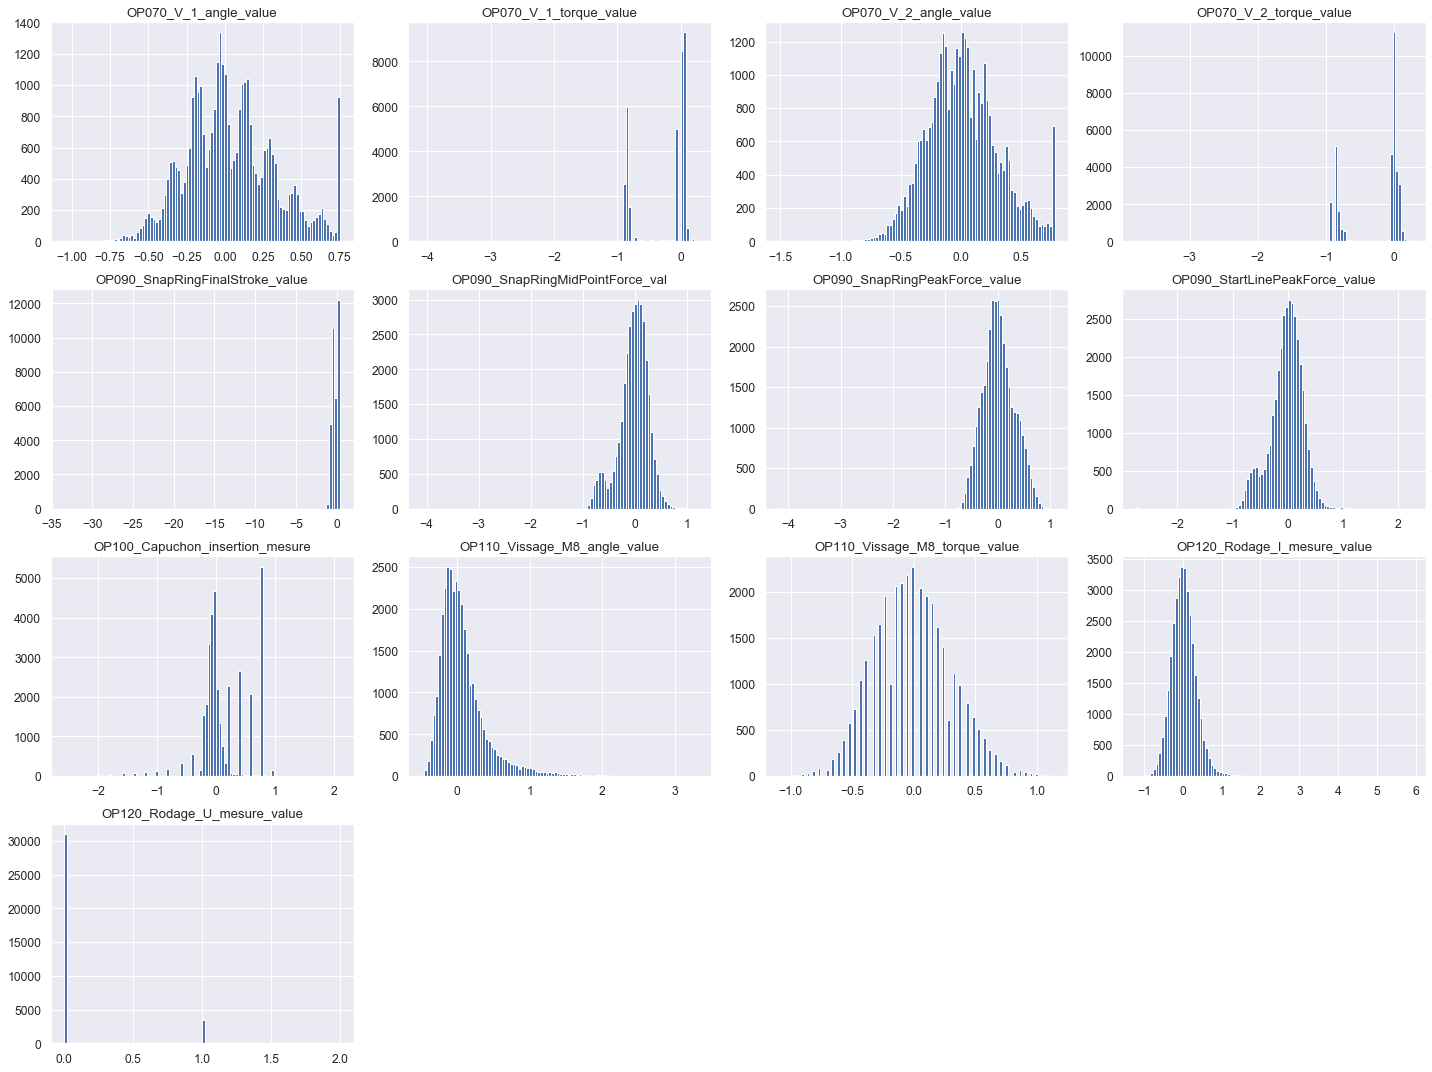

In [47]:
X_data_transformed_scaled = tsf.robust_scaler_transform(X_data_transformed)
ImgUtil.save_df_hist_plot(X_data_transformed_scaled,"X_data_imputed_robust_scaled",bins=100)
plt.show()

###### <u>Pourquoi appliquer un scaling:</u>

Les algorithmes d'apprentissage automatique prennent en compte uniquement la magnitude des mesures, mais pas les unités de ces mesures.\
Par la suite, une caractéristique exprimée en une magnitude (nombre) très élevée, peut affecter la prévision beaucoup plus qu’une caractéristique tout aussi importante.

Notez que tous les algorithmes se comportent pas de cette façon et par la suite l'application du scaling n'est pas un pré-requis pour tout les algorithmes.

Les algorithmes à base d'arbres et de Naive Bayes ne nécessitent pas de mise à l'échelle des fonctionnalités, car ils fonctionnent.\
Les algorithmes qui exploitent des distances ou des similitudes (par exemple sous forme de produit scalaire) entre des échantillons de données, tels que k-NN et SVM, nécessitent souvent une mise à l'échelle des fonctionnalités.

    

####  <u>c - Histogramme des features après gestion des valeurs manquantes + Transformation 'log10'</u>:

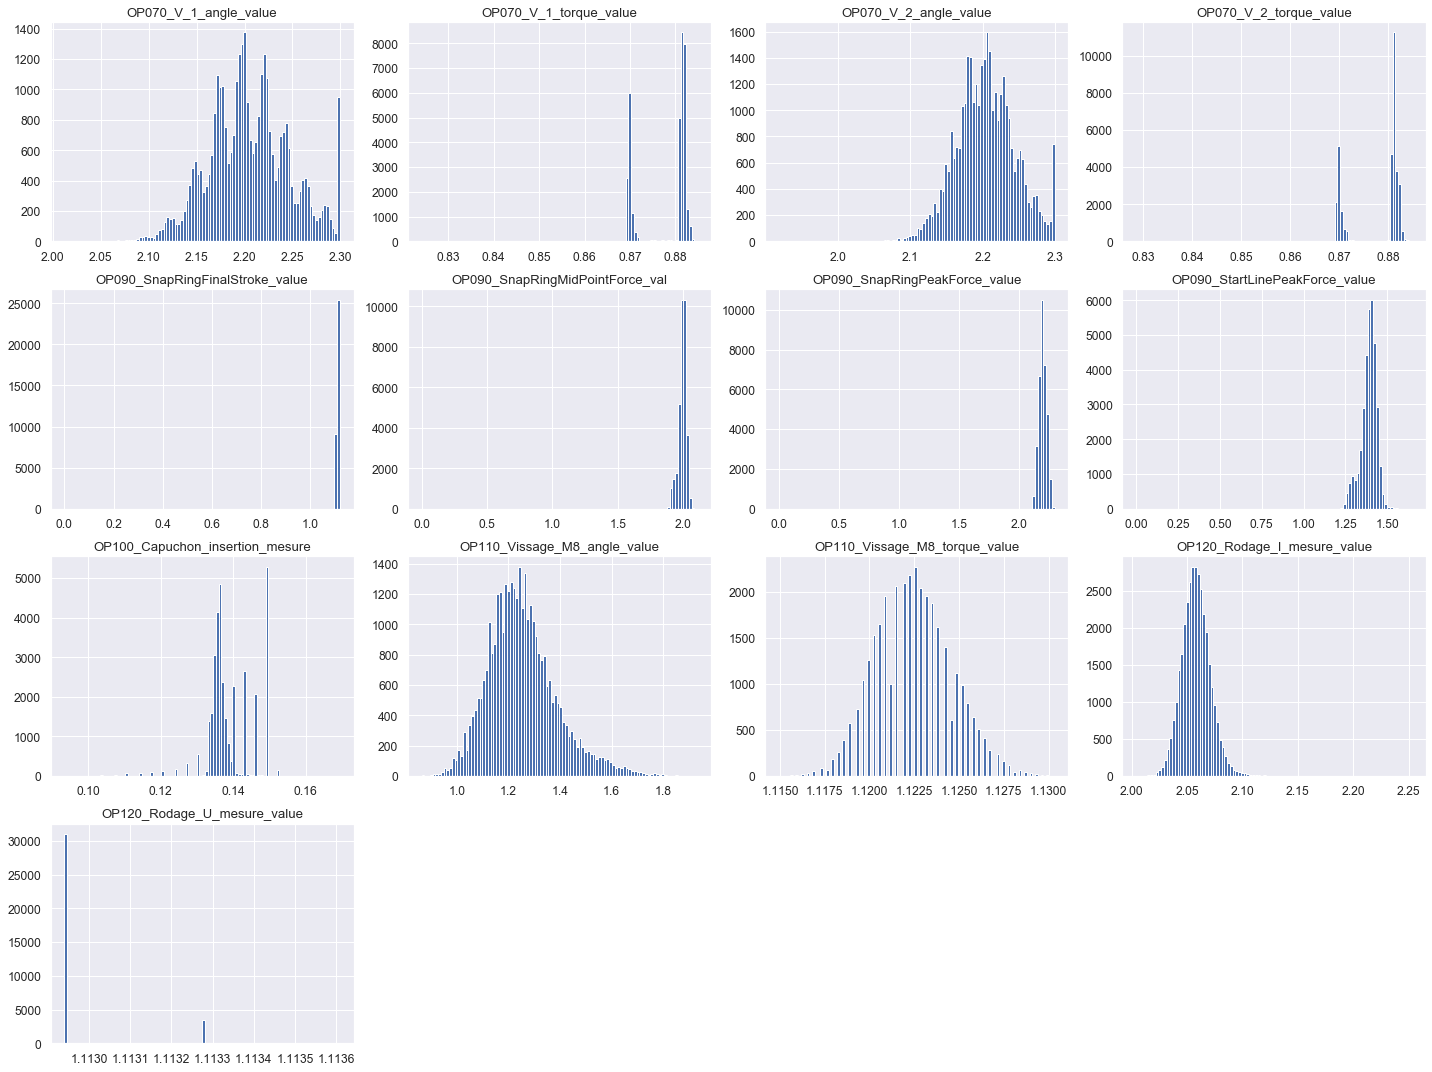

In [48]:
tsf = transf.Transformer()
X_data_offset_1 = X_data_transformed + 1
X_data_transformed_log10 = X_data_offset_1.applymap(np.log10)
ImgUtil.save_df_hist_plot(X_data_transformed_log10,"X_data_imputed_log10", bins=100)
plt.show()

On constate que les distributions ci dessus correspondant aux features transformées par log10 **resemblent plus** à des distributions Normales.

####  <u>d - 'Violon' et 'boîte à moustaches' des features avec gestion des valeurs manquantes</u>:

Chacun des graphes suivants correspond à la superposition de 2 graphes: Celui d'une 'boîte à mustaches' et d'un 'violon'.\
La 'boîte à moustache' représente clairement Q1, Q3, médianne, moustaches, min, max, outliers.\
Alors que le 'violon' montre bien la distribution des données à l'intérieur.\



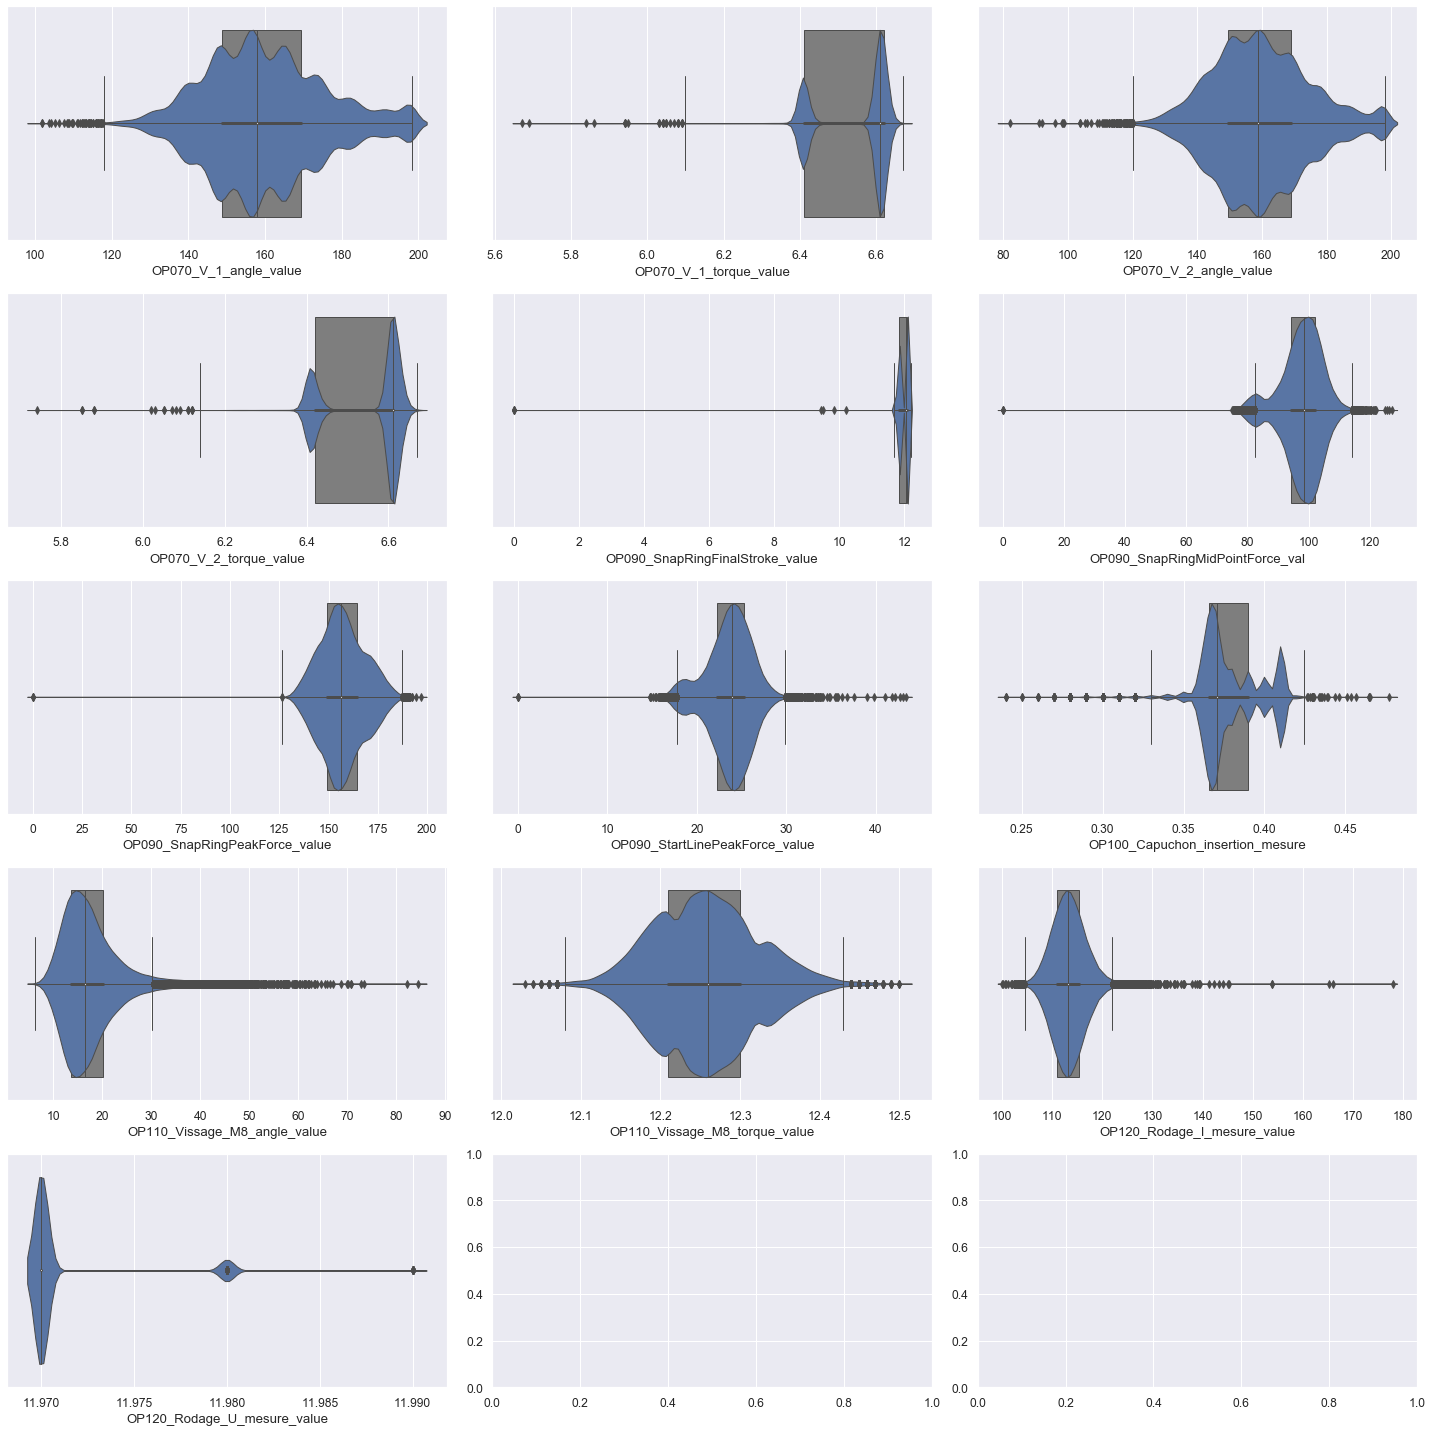

In [49]:
ImgUtil.save_df_violin_plot(X_data_transformed, 'X_data_distribution', 3)  
    

Représenter la distribution d'une feature par un 'violin plot' superposé à un 'box plot' permet de:
  * Visualiser la taille de la distribution d'une feature en fonction de sa valeur
  * Afficher Q1,Q3 et la médiane 
  * Afficher les moustaches inférieur et supérieur ainsi que les outliers

####  <u>e - Violon et boîte à moustaches des features avec gestion des valeurs manquantes + application de 'RobustScaler'</u>:

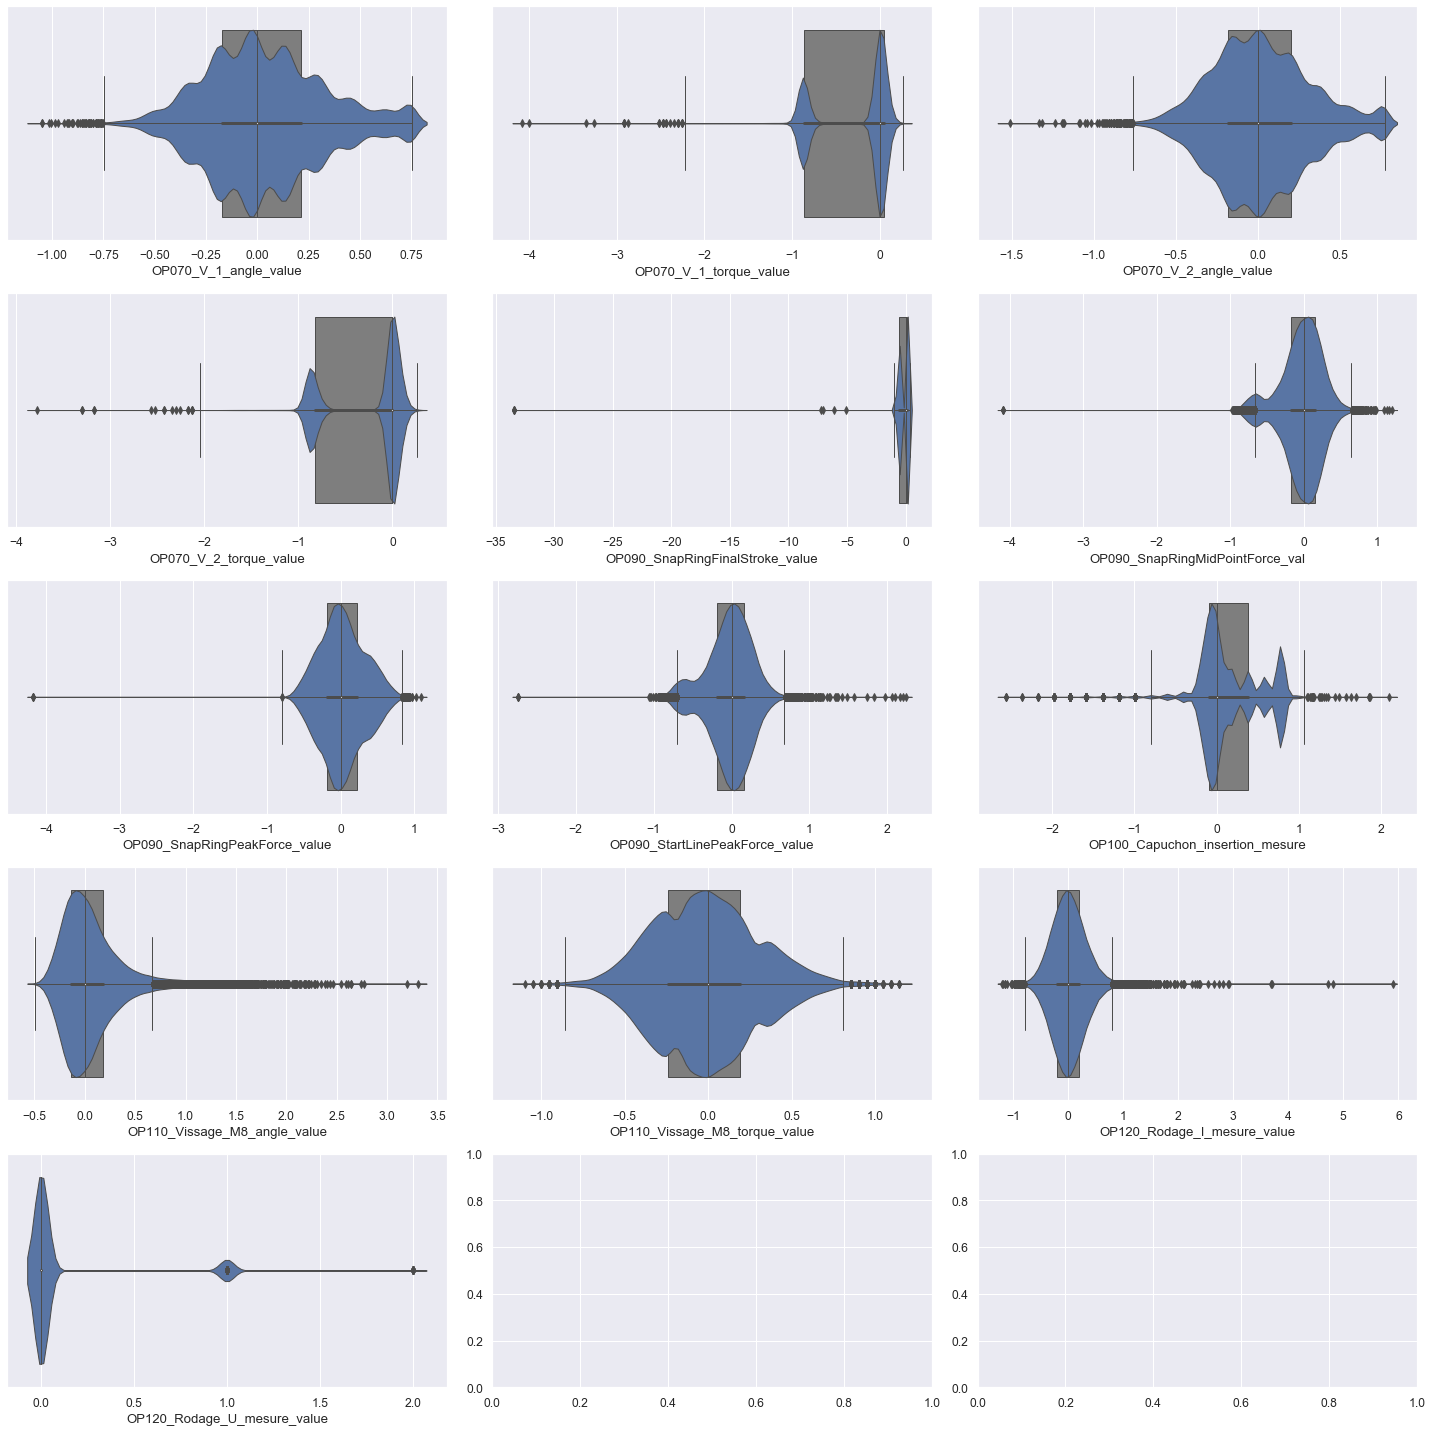

In [50]:
# fig_id = 'features_distribution_scaled'
ImgUtil.save_df_violin_plot(X_data_transformed_scaled, 'X_data_scaled_distribution_scaled', 3)

## 7 - Exploration graphique bivariables 'feature/target' des données
#### <u>a - Matrice de correlation (pearson) et heatmap après gestion des valeurs manquantes :</u>


La corrélation des données est un moyen de comprendre la relation entre plusieurs features/target dans un ensemble de données.

In [51]:
# 1 - Charger les features et la target en les croisant:
XY_data_with_id = pd.merge(left=data, right=Y_data, how='inner', left_on=Const.PROC_TRACEINFO, right_on=Const.PROC_TRACEINFO)
XY_data_with_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [52]:
# 2 - Rajout des missing values afin d'avoir une meilleure représentation 
XY_data = XY_data_with_id.drop(columns = Const.PROC_TRACEINFO)
XY_data_transformed = tsf.iterative_imputer_transform(XY_data)

In [53]:
# 3 - Correlation entre la target "Binar OP130_Resultat_Global_v" et les autres attributs
corr_matrix = XY_data_transformed.corr()
corr_matrix[Const.Binar_OP130_Resultat_Global_v].sort_values(ascending=False)

Binar OP130_Resultat_Global_v      1.000000
OP100_Capuchon_insertion_mesure    0.040366
OP090_SnapRingFinalStroke_value    0.015148
OP090_SnapRingMidPointForce_val    0.014273
OP090_StartLinePeakForce_value     0.010720
OP110_Vissage_M8_angle_value       0.005470
OP120_Rodage_I_mesure_value        0.003763
OP110_Vissage_M8_torque_value     -0.002984
OP070_V_2_angle_value             -0.006342
OP090_SnapRingPeakForce_value     -0.007290
OP120_Rodage_U_mesure_value       -0.010492
OP070_V_1_angle_value             -0.012793
OP070_V_1_torque_value            -0.037438
OP070_V_2_torque_value            -0.039752
Name: Binar OP130_Resultat_Global_v, dtype: float64

Le coefficient de correlation varie entre -1 et 1.\
Quand il est proche de 1, ca veut dire qu'il y a une correlation forte positive.\
Quand il est proche de -1, ca veut dire qu'il y a une correlation forte négative.\
Quand il est proche de 0, ca veut dire qu'il n'y a pas de **correlation linéaire** \

**Le coefficient de correlation mesure uniquement les correlations linéaires**

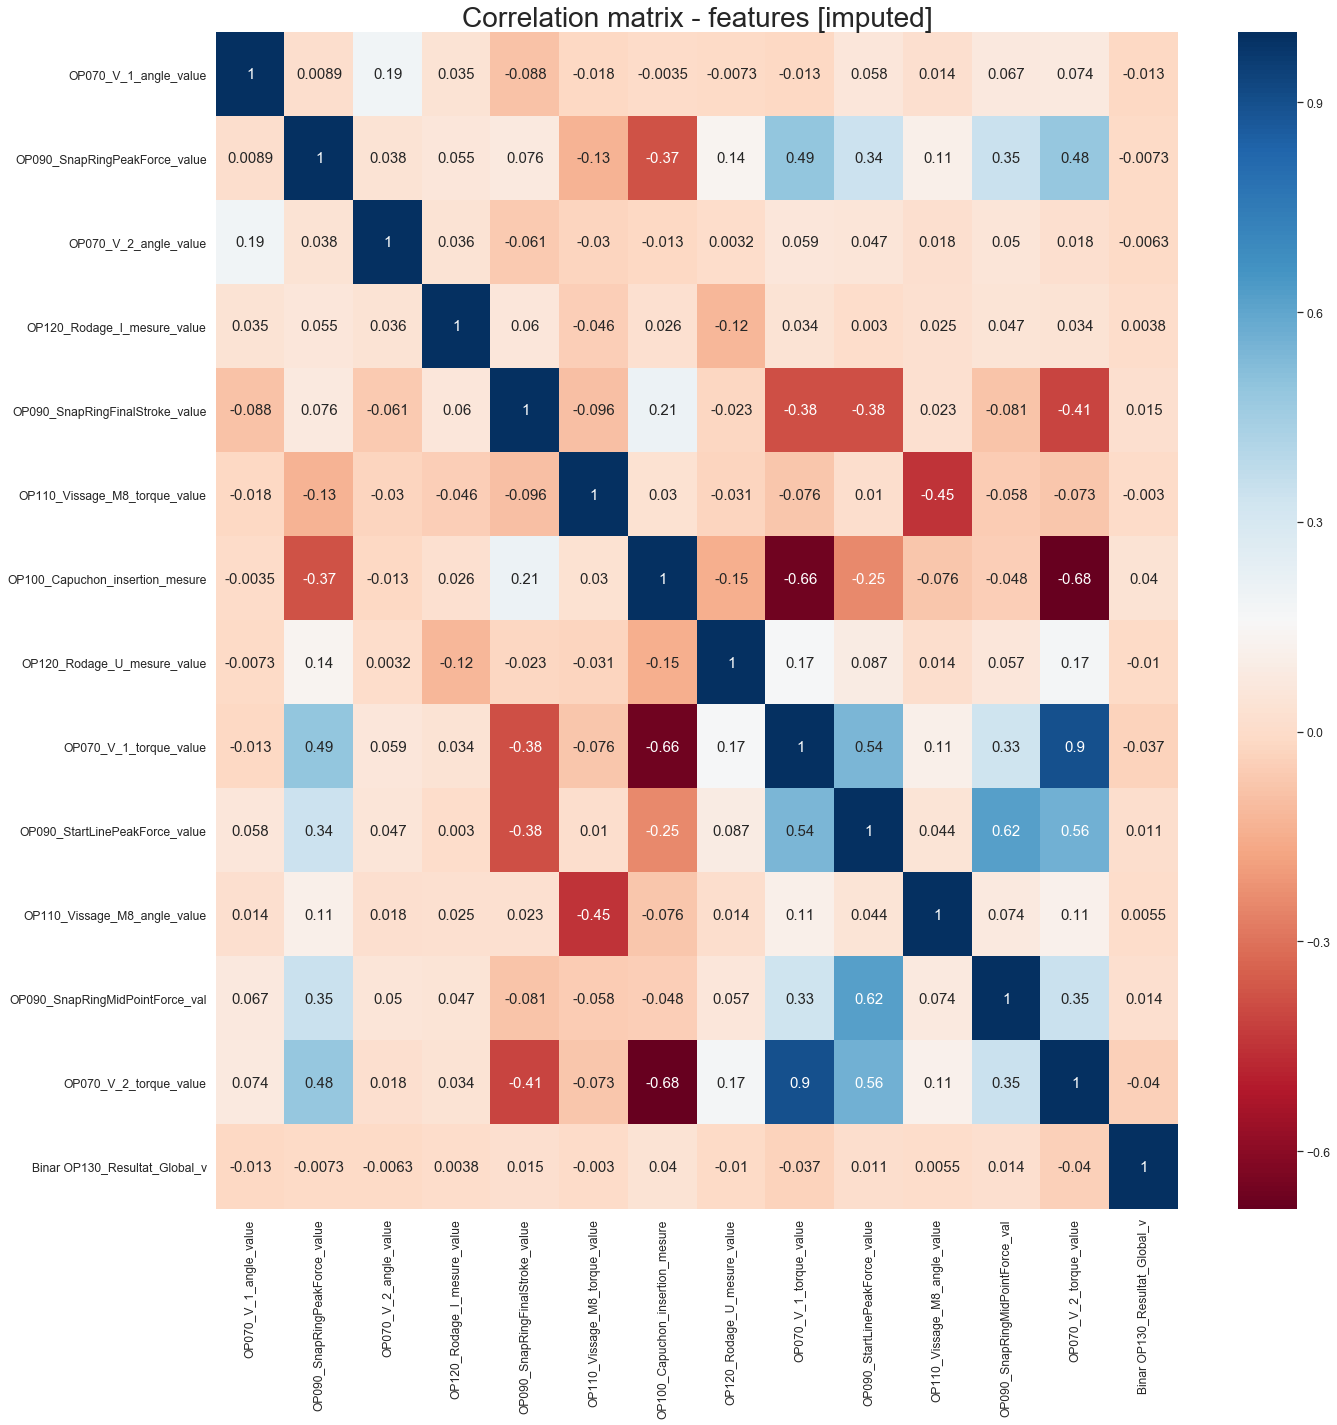

In [54]:
# 4 - Dessiner la Heatmap
title = 'Correlation matrix - features [{0}]'
ImgUtil.save_df_heatmap_plot(corr_matrix,title.format('imputed'))

En observant la mattrice de correlation, on constate:
  * L'inexistence d'aucune correlation forte entre la target 'Binar OP130_Resultat_Global_v' et n'importe quel feature.
  * L'exitence de correlations positives (0.54, 0.49, 0.48, .. ) et negatives (-0.68, -0.45, -0.38, ... ) parmi les autres features

#### <u>b - Matrice de correlation et heatmap avec gestion des valeurs manquantes et rescale:</u>

In [55]:
# 1 - Appliquer la transformation 'Robust Scaler'
XY_data_transformed_scaled = tsf.robust_scaler_transform(XY_data_transformed.drop(columns=Const.Binar_OP130_Resultat_Global_v, axis=1))

# 2 - Rajouter la target à la dataframe
XY_data_transformed_scaled[Const.Binar_OP130_Resultat_Global_v] = XY_data_transformed[Const.Binar_OP130_Resultat_Global_v]

# 3 - Correlation entre la target "Binar OP130_Resultat_Global_v" et les autres attributs
corr_matrix_scaled = XY_data_transformed_scaled.corr()
corr_matrix_scaled[Const.Binar_OP130_Resultat_Global_v].sort_values(ascending=False)

Binar OP130_Resultat_Global_v      1.000000
OP100_Capuchon_insertion_mesure    0.040366
OP090_SnapRingFinalStroke_value    0.015148
OP090_SnapRingMidPointForce_val    0.014273
OP090_StartLinePeakForce_value     0.010720
OP110_Vissage_M8_angle_value       0.005470
OP120_Rodage_I_mesure_value        0.003763
OP110_Vissage_M8_torque_value     -0.002984
OP070_V_2_angle_value             -0.006342
OP090_SnapRingPeakForce_value     -0.007290
OP120_Rodage_U_mesure_value       -0.010492
OP070_V_1_angle_value             -0.012793
OP070_V_1_torque_value            -0.037438
OP070_V_2_torque_value            -0.039752
Name: Binar OP130_Resultat_Global_v, dtype: float64

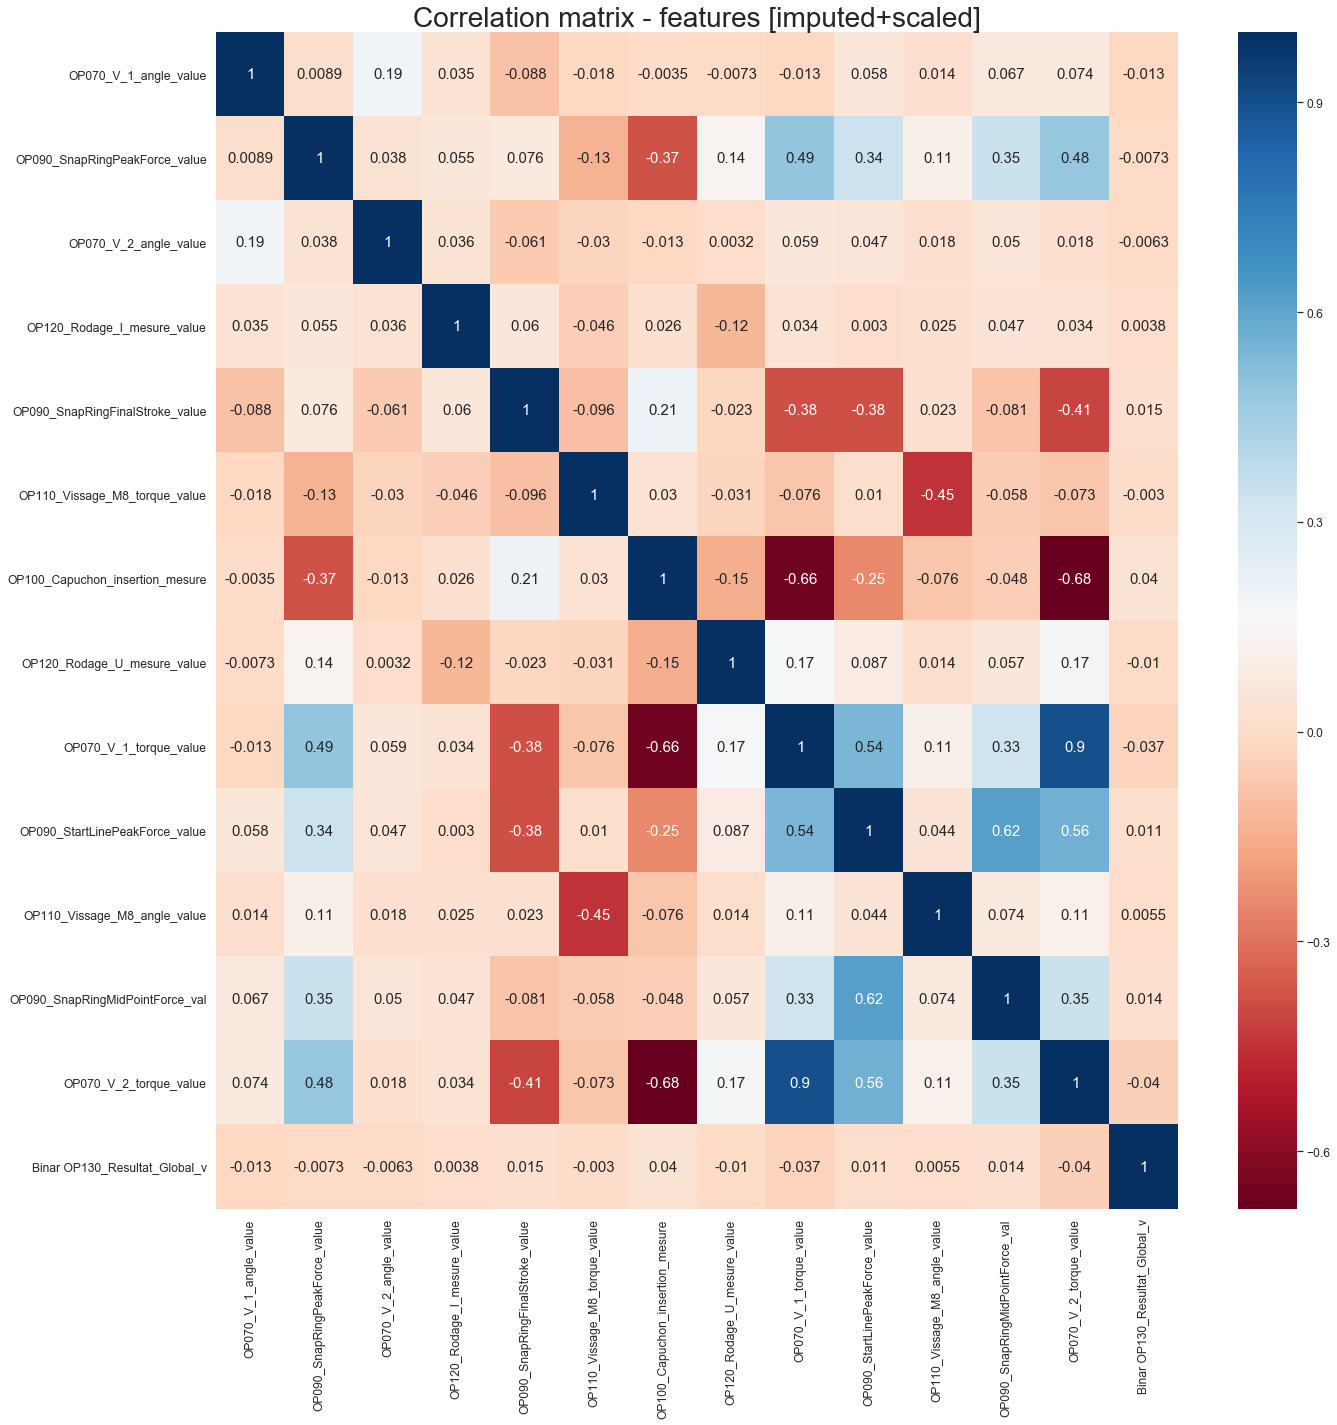

In [56]:
# 4 - Dessiner la Heatmap
ImgUtil.save_df_heatmap_plot(corr_matrix,title.format('imputed+scaled'))

#### <u>c - Nuage de points entre la target 'Binar OP130_Resultat_Global_v' et les autres features:</u>

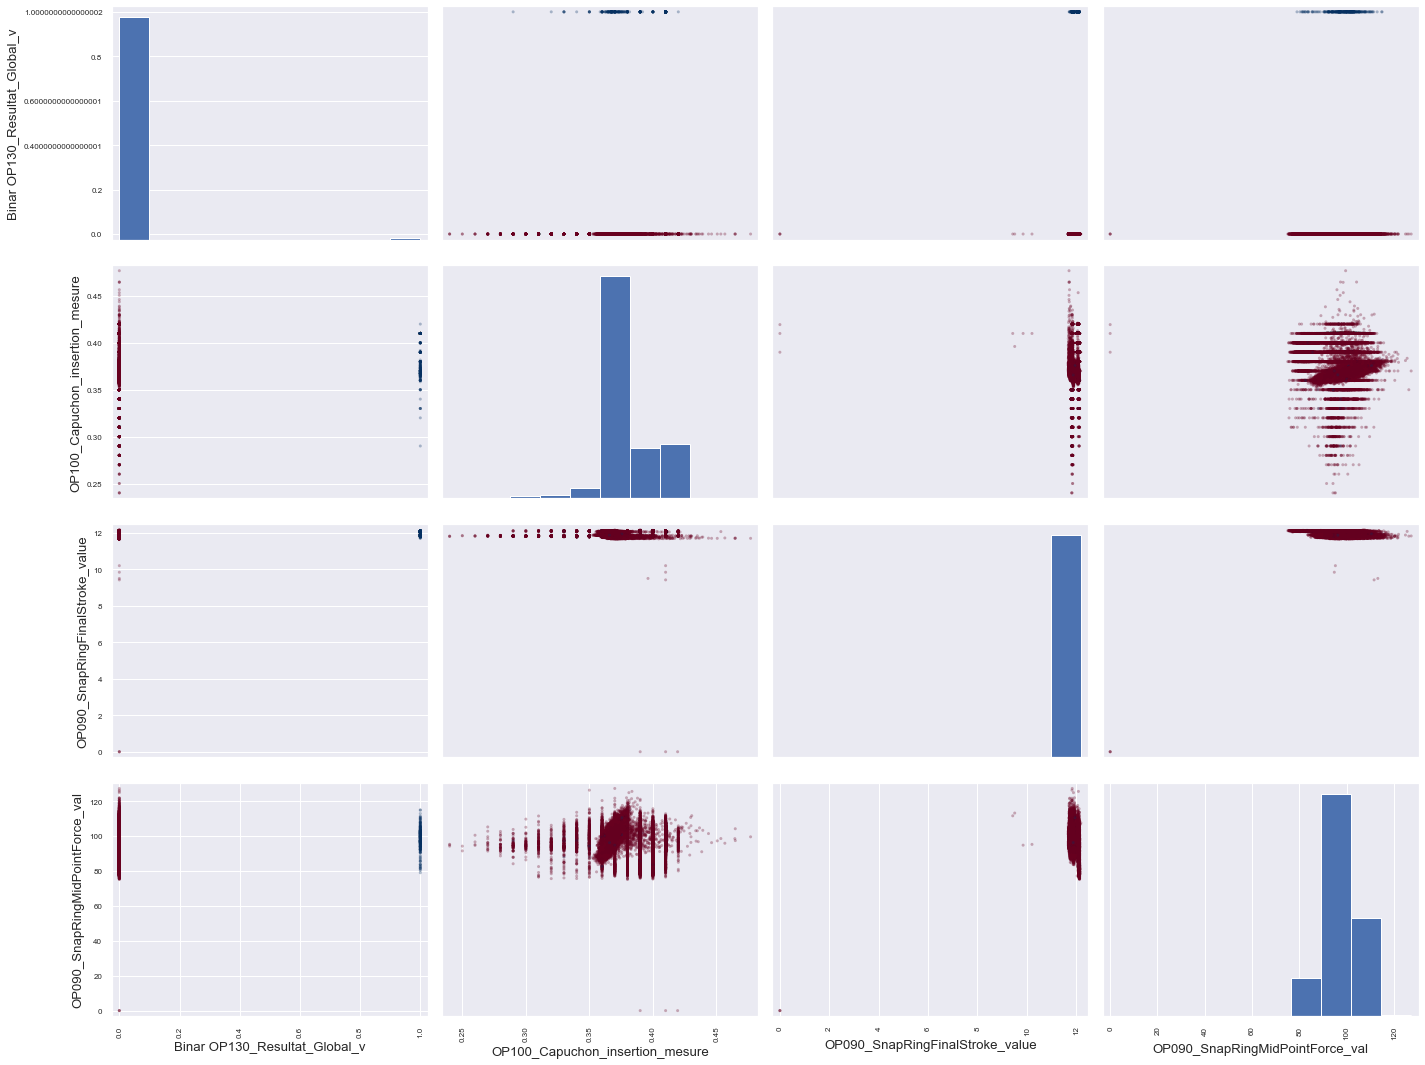

In [57]:
features = [Const.Binar_OP130_Resultat_Global_v,
            Const.OP100_Capuchon_insertion_mesure, Const.OP090_SnapRingFinalStroke_value, Const.OP090_SnapRingMidPointForce_val]
ImgUtil.save_df_scatter_matrix_plot(XY_data_transformed[features], "XY_data_imputed_corr_pos_1", cfield=Const.Binar_OP130_Resultat_Global_v)

La diagonale allant du coin-gauche-haut au coin-droite-bas represente des barres droites d'histogramme, ces graphes représentent le nombre d'observations d'une feature (ou de la target) en fonction des différentes valeurs que cette feature peut prendre.\
Le nuage rouge représente les démarreurs étiquetés OK(O) et le bleu représente les KO(1)

**NB:**
On constate que le graphe correspondant à la target (Binar OP130_Resultat_Global_v) représente une distribution fortement déséquilbrée entre les 2 valeurs '0' et '1' que peut prendre la target.

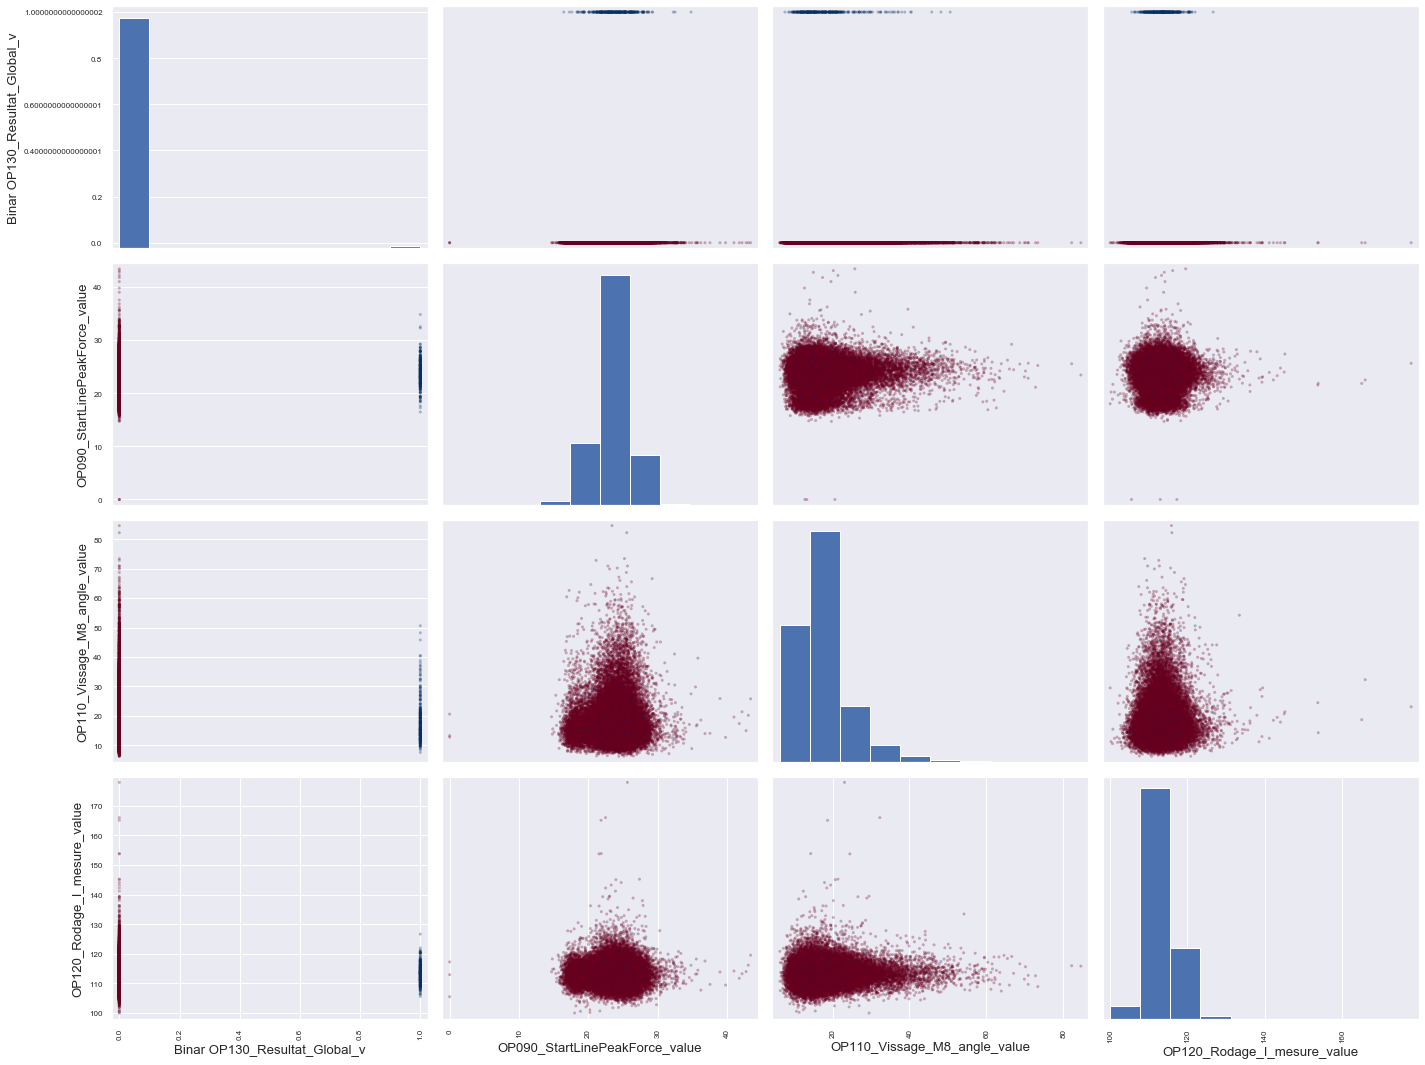

In [58]:
features = [Const.Binar_OP130_Resultat_Global_v,
            Const.OP090_StartLinePeakForce_value, Const.OP110_Vissage_M8_angle_value, Const.OP120_Rodage_I_mesure_value]
ImgUtil.save_df_scatter_matrix_plot(XY_data_transformed[features], "XY_data_imputed_corr_pos_2", cfield=Const.Binar_OP130_Resultat_Global_v)

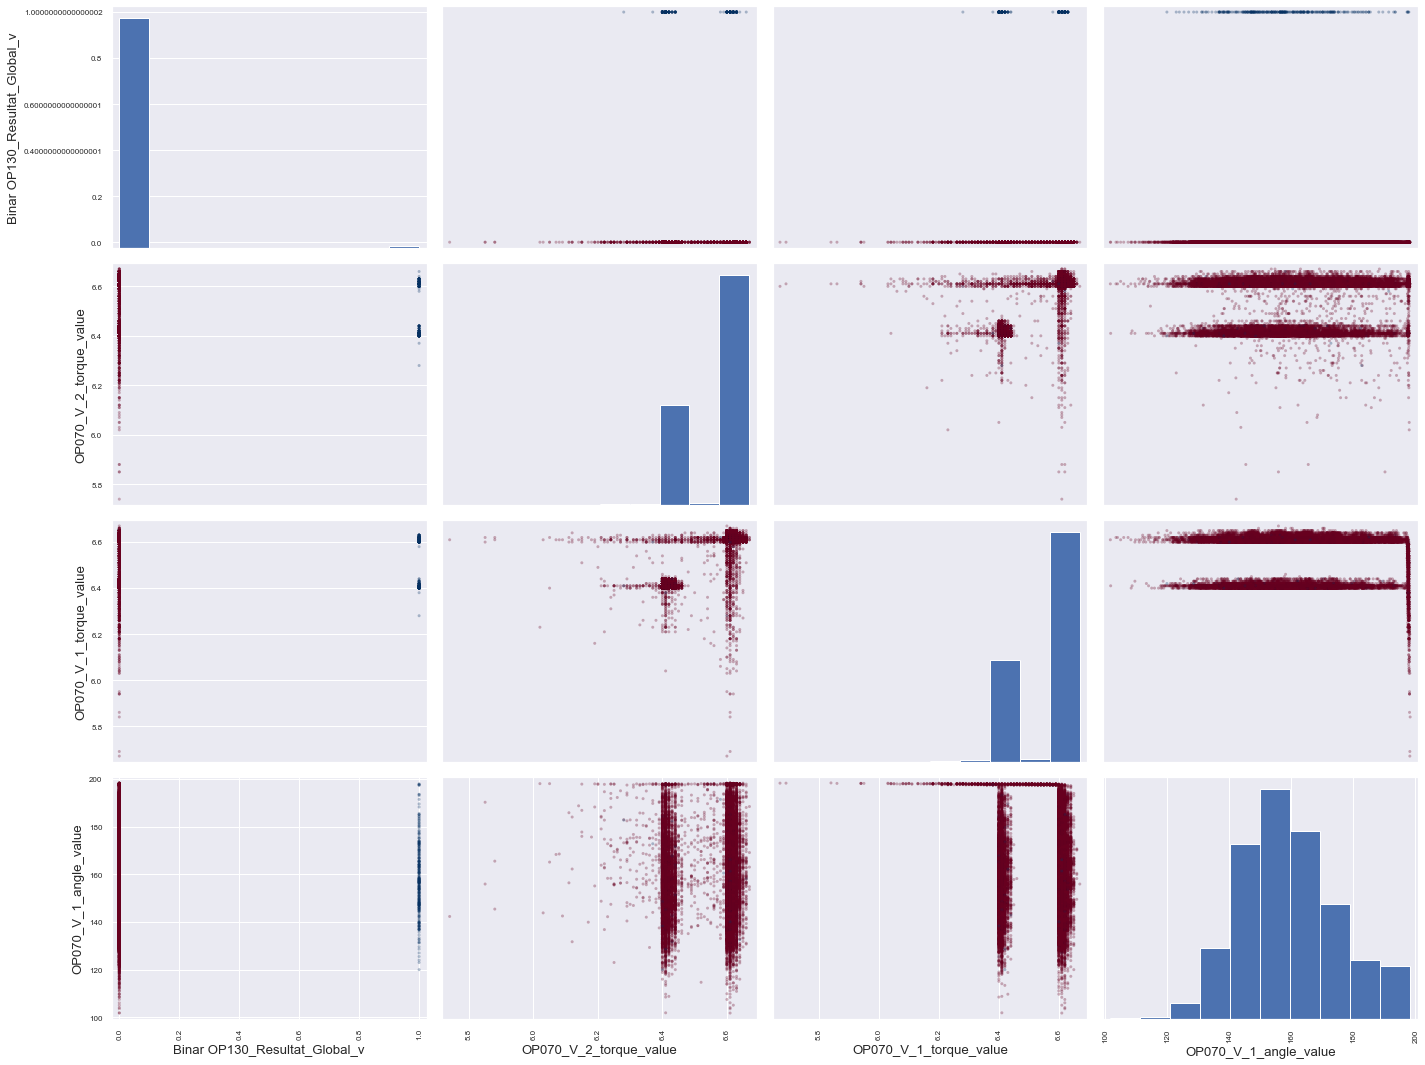

In [59]:
features = [Const.Binar_OP130_Resultat_Global_v,
            Const.OP070_V_2_torque_value, Const.OP070_V_1_torque_value, Const.OP070_V_1_angle_value]
ImgUtil.save_df_scatter_matrix_plot(XY_data_transformed[features], "XY_data_imputed_neg_1", cfield=Const.Binar_OP130_Resultat_Global_v)

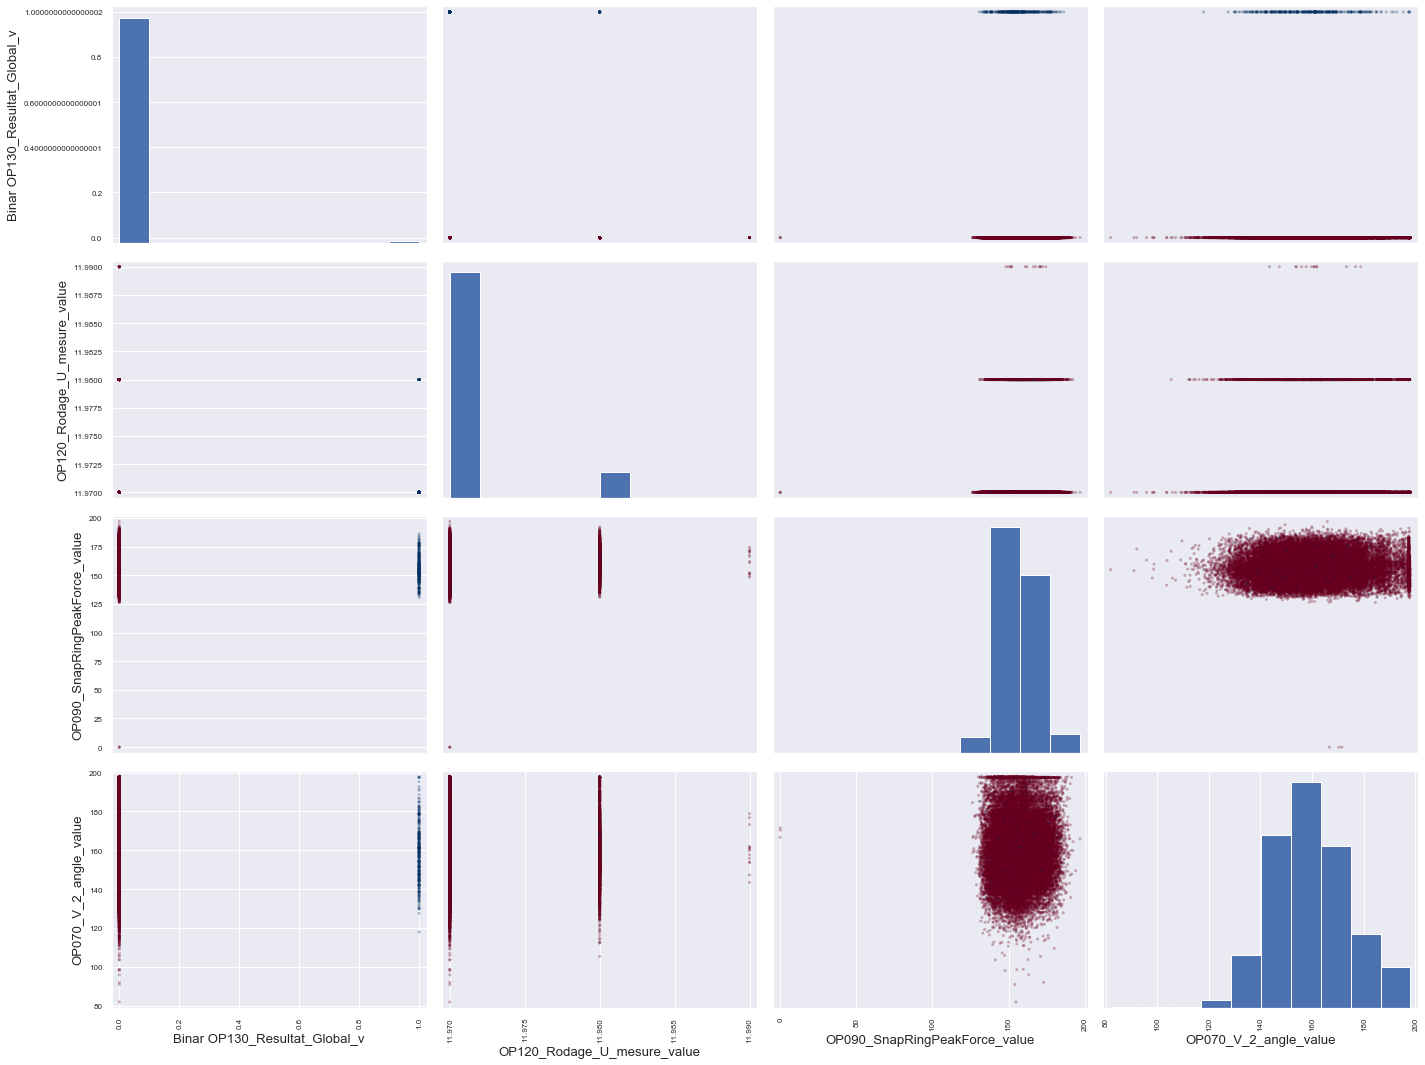

In [60]:
features = [Const.Binar_OP130_Resultat_Global_v,
            Const.OP120_Rodage_U_mesure_value, Const.OP090_SnapRingPeakForce_value, Const.OP070_V_2_angle_value]
ImgUtil.save_df_scatter_matrix_plot(XY_data_transformed[features], "XY_data_imputed_neg_2", cfield=Const.Binar_OP130_Resultat_Global_v)


D'après les graphes, on constate qu'il n'y aucune relation lineaire !!

## 8 - Feature Engineering/Sélection et choix faits/Hypothèses choisies : TODO

## 9 - Analyse de la target

#### <u>a - Vérification de l'équilibre des données:</u>

In [61]:
starter_count = len(Y_data[Const.Binar_OP130_Resultat_Global_v])
starter_count_ok = Y_data[Const.Binar_OP130_Resultat_Global_v].value_counts()[0]
starter_count_ko = Y_data[Const.Binar_OP130_Resultat_Global_v].value_counts()[1]
# 
print(f'Nombre total des démarreurs : {starter_count}')
print(f'Nombre total des démarreurs OK => Nombre de Classes Negatives : {starter_count_ok} soit {round(starter_count_ok/starter_count * 100,2)} % du dataset')
print(f'Nombre total des démarreurs KO => Nombre de Classes Positives : {starter_count_ko} soit {round(starter_count_ko/starter_count * 100,2)} % du dataset')

Nombre total des démarreurs : 34515
Nombre total des démarreurs OK => Nombre de Classes Negatives : 34210 soit 99.12 % du dataset
Nombre total des démarreurs KO => Nombre de Classes Positives : 305 soit 0.88 % du dataset


#### <u>b - Distribution du dataset selon les classes de la target:</u>

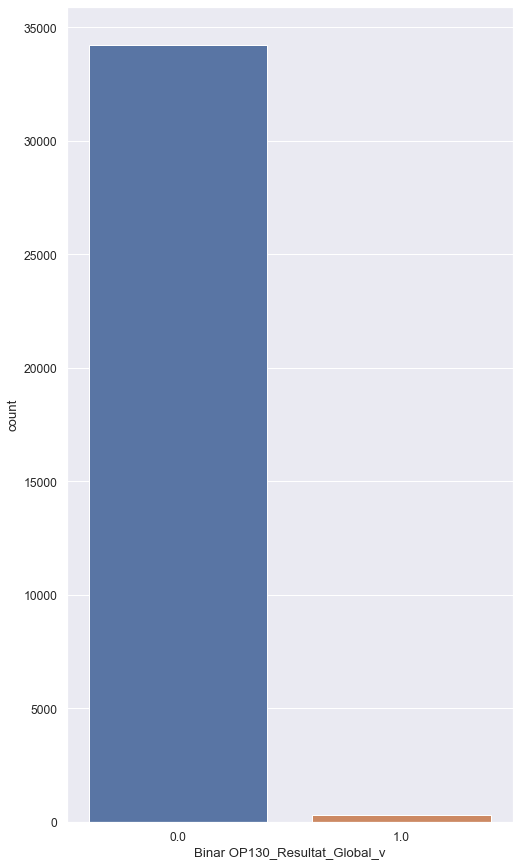

In [62]:
plt.figure(figsize=(8, 15))
sns.countplot(Const.Binar_OP130_Resultat_Global_v, data=XY_data_transformed)

On constate que le jeu de données est fortement déséquilibré.\
Presque totalité des démarreurs (99.12%) ne sont pas défectueux lors de la sortie de la ligne de production.

En utilisant cette base de données comme base pour les modèles prédictifs et pour les analyses, on pourrait obtenir beaucoup d'erreurs par des algorithmes inadaptés car ils 'supposeront' que les 'demarreurs' ne sont pas défectueux.\
On cherche un modèle capable de déceler les patterns qui prédisent les défauts sur les lignes de production du démarreur.

#### <u>c - Histogramme de distribution du jeu de données selon les classes de la target:</u>

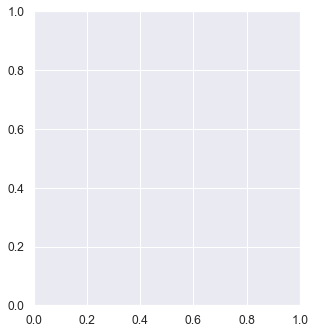

In [63]:
ImgUtil.save_df_XY_hist_plot(XY_data_transformed, "XY_imputed", y_target_name=Const.Binar_OP130_Resultat_Global_v)

<img src="./images/XY_imputed_OP070_V_1_angle_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP070_V_1_torque_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP070_V_2_angle_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP070_V_2_torque_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP090_SnapRingFinalStroke_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP090_SnapRingMidPointForce_val_histogram_5x5.png">
<img src="./images/XY_imputed_OP090_SnapRingPeakForce_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP090_StartLinePeakForce_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP100_Capuchon_insertion_mesure_histogram_5x5.png">
<img src="./images/XY_imputed_OP110_Vissage_M8_angle_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP110_Vissage_M8_torque_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP120_Rodage_I_mesure_value_histogram_5x5.png">
<img src="./images/XY_imputed_OP120_Rodage_U_mesure_value_histogram_5x5.png">

In [64]:
HGBC = HistGradientBoostingClassifier(max_iter = 100 , max_depth=10,learning_rate=0.10, l2_regularization=5)
BBC  = BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(),  n_estimators=300, sampling_strategy='auto', replacement=False, random_state=48)
BRFC = BalancedRandomForestClassifier(n_estimators = 300 , max_depth=20, random_state=0)
BRFC_ = BalancedRandomForestClassifier(n_estimators = 300 , max_depth=20, random_state=0, replacement=True) 

BRFC_W = BalancedRandomForestClassifier(n_estimators = 300 , max_depth=20, random_state=0, class_weight={0:1, 1:1}) 
RUSBoost = RUSBoostClassifier(n_estimators = 8 , algorithm='SAMME.R', random_state=42)
XGBC = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                              colsample_bynode=1, colsample_bytree=1, gamma=0,
                              learning_rate=0.1, max_delta_step=0, max_depth=10, #max_depth=3,
                              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='binary:logistic', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=100, seed=42,
                              silent=None, subsample=1, verbosity=1)   
KNN = KNeighborsClassifier(3)
SVC = SVC(kernel="rbf", C=0.025, probability=True)
# NuSVC = NuSVC(probability=True),
# LinearSVC = LinearSVC(C=0.1, class_weight={'1':100})
# SGDClassifier = SGDClassifier(class_weight='balanced')
RFC =  RandomForestClassifier(n_estimators=300, max_depth=10, max_features=10, n_jobs=4, class_weight= {0:1,1:100})
DTC = DecisionTreeClassifier()  # so bad
ADABoost = AdaBoostClassifier()
GBC  = GradientBoostingClassifier()
LRC  = LogisticRegression(max_iter=500)  # Best for Recall 1
# GNB   = GaussianNB()


- Model score: 0.9911154031868662
- Accuracy score: 0.9911154031868662
- Balanced accuracy score: 0.5 / The balanced accuracy to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
- Average_precision_score: 0.008884596813133751
- Precision_score: 0.0
- Recall score: 0.0
- Roc_auc_score: 0.5
- F1 score: 0.0
- [10263     0]/[92  0] - P:0.0000 - R:0.0000 - roc_auc:0.5000 - f1:0.0000
- [[10263     0]
 [   92     0]]
- classification_report_imbalanced:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.00      1.00      0.00      0.00     10263
          1       0.00      0.00      1.00      0.00      0.00      0.00        92

avg / total       0.98      0.99      0.01      0.99      0.00      0.00     10355

- classification_report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10263
           1       0.00      0.00   

C:\envdev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\envdev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\envdev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


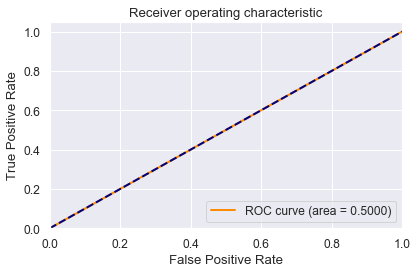

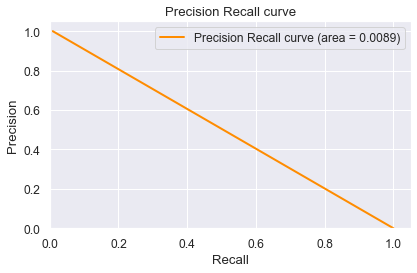

In [65]:
#--Train Test Split--#
# 1 - Rechargement des données
from sklearn.decomposition import KernelPCA
mt_train = XY_metadata([Const.rootDataTrain(), 'traininginputs.csv'], [Const.rootDataTrain(), 'trainingoutput.csv'], 
                       [Const.PROC_TRACEINFO], [Const.PROC_TRACEINFO],Const.Binar_OP130_Resultat_Global_v)
xy_loader = XY_Loader();
X_df, y_df = xy_loader.load_XY_df(mt_train)

# 2 - Split Training et Validation
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=48, stratify=y_df)

# 3 - Imputer et Scaler + # 4 - SMOTE
modeler = ValeoModeler()
pred = ValeoPredictor()
pl = Pipeline([('preprocessor', modeler.build_transformers_pipeline(X_train.dtypes)),
#               ('imbalancer_resampler', SMOTE(sampling_strategy='minority', random_state=7)), 
#                ('KernelPca', KernelPCA(n_components=5, kernel='rbf')),
                ('classifier', SVC)
              ])
# HGBC, BBC, BRFC, RUSBoost, XGBC, KNN, SVC, NuSVC, RFC, DTC, ADABoost, GBC, LRC, LinearSVC, SGDClassifier
# preprocessor + imbalancer_resampler + classifier_BRFC(n_estimators= 300,max_depth=20)
pl.fit(X_train, y_train)       
pred.predict_and_plot(pl,X_test, y_test)

# 5 - Test using ENS data
X_ens = DfUtil.read_csv([Const.rootDataTest() , "testinputs.csv"])
y_ens = pl.predict(X_ens.drop(columns=[Const.PROC_TRACEINFO]))
DfUtil.write_y_csv(X_ens[Const.PROC_TRACEINFO], y_ens, Const.Binar_OP130_Resultat_Global_v, [Const.rootDataTest() , "testoutput.csv"])

# pred = ValeoPredictor()
# oversampled_X.columns = X_train.columns
# oversampled_y.columns = y_train.columns
# # 4 - SMOTE # sm = SMOTE(ratio='minority', random_state=7)
# sm = SMOTE(sampling_strategy='minority', random_state=7)
# oversampled_X, oversampled_Y = sm.fit_sample(X_train, y_train)
# # 5 - Fit sur Training set
# fitted_model = pred.fit_and_plot(oversampled_X, oversampled_y, X_test, y_test, [ValeoModeler.BRFC])    

fit_time : [3.230757   2.23618174 3.19266987 3.13499188 3.22408891 3.3691566
 3.26276374 3.2629509 ]
score_time : [0.26706648 0.25166464 0.2278266  0.26897001 0.31897998 0.31195045
 0.29102635 0.27707124]
test_f1 : [0.03296703 0.03562341 0.03469211 0.0282436  0.03511572 0.02303263
 0.02657219 0.03174603]
train_f1 : [0.05307089 0.05212284 0.05393771 0.0555628  0.05056711 0.05846995
 0.05426651 0.05309515]
test_f1_micro : [0.69409038 0.67062572 0.67757822 0.68105446 0.64966676 0.70501304
 0.68154158 0.68183135]
train_f1_micro : [0.68538907 0.67934603 0.69072848 0.70028974 0.66739787 0.71474691
 0.69127933 0.68407765]
test_f1_macro : [0.42563699 0.41851039 0.42058027 0.41873105 0.41054777 0.42465625
 0.41810161 0.42069271]
train_f1_macro : [0.43221385 0.4295785  0.43454394 0.43872278 0.42447569 0.44519029
 0.43489881 0.43175361]
test_f1_weighted : [0.81125436 0.7945205  0.79953766 0.80220512 0.77945246 0.81929713
 0.80282381 0.80287706]
train_f1_weighted : [0.80467159 0.80037868 0.8084391

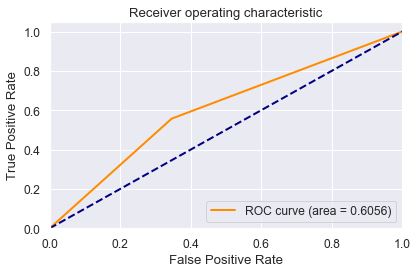

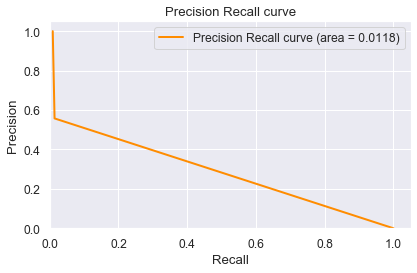

In [66]:
#--Cross Validation--#
# 1 - Rechargement des données
mt_train = XY_metadata([Const.rootDataTrain(), 'traininginputs.csv'], [Const.rootDataTrain(), 'trainingoutput.csv'], 
                       [Const.PROC_TRACEINFO], [Const.PROC_TRACEINFO],Const.Binar_OP130_Resultat_Global_v)
xy_loader = XY_Loader();
X_df, y_df = xy_loader.load_XY_df(mt_train)
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=48, stratify=y_df)

# 2 - Initialize a CV Split
CV = StratifiedKFold(n_splits=8) # , random_state=48, shuffle=True

# 3 - Imputer et Scaler + # 4 - SMOTE
modeler = ValeoModeler()
pred = ValeoPredictor()
BRFC = BalancedRandomForestClassifier(n_estimators = 300 , max_depth=20, random_state=0)
pl = Pipeline([('preprocessor', modeler.build_transformers_pipeline(X_train.dtypes)),
#               ('imbalancer_resampler', SMOTE(sampling_strategy='minority', random_state=7)), 
              ('classifier', BRFC)
              ])
# HGBC, BBC, BRFC, RUSBoost, XGBC, KNN, SVC, NuSVC, RFC, DTC, ADABoost, GBC, LRC, LinearSVC, SGDClassifier

# 4 - Cross Validate
cv_results =  cross_validate(pl, X_train, y_train, cv=CV, scoring=('f1', 'f1_micro', 'f1_macro', 'f1_weighted', 'recall', 'precision', 'average_precision', 'roc_auc'), return_train_score=True, return_estimator=True)
fitted_estimators = []
test_roc_auc = 0.0
for key in cv_results.keys() :
    if str(key) !=  "estimator" :
        print(f"{key} : {cv_results[key]}")
    fitted_estimators.append(cv_results[key])
    
print(f'np.argmax(test_roc_auc): {np.argmax(cv_results["test_roc_auc"])}')
fitted_model = cv_results["estimator"][np.argmax(cv_results["test_roc_auc"])]

    
# pl.fit(X_train, y_train)       
pred.predict_and_plot(fitted_model,X_test, y_test)

# 5 - Test using ENS data
X_ens = DfUtil.read_csv([Const.rootDataTest() , "testinputs.csv"])
y_ens = fitted_model.predict(X_ens.drop(columns=[Const.PROC_TRACEINFO]))
DfUtil.write_y_csv(X_ens[Const.PROC_TRACEINFO], y_ens, Const.Binar_OP130_Resultat_Global_v, [Const.rootDataTest() , "testoutput.csv"])
    

  

In [67]:
#--PCA--#
import numpy as np
from sklearn.decomposition import PCA

# 1 - Rechargement des données
mt_train = XY_metadata([Const.rootDataTrain(), 'traininginputs.csv'], [Const.rootDataTrain(), 'trainingoutput.csv'], 
                       [Const.PROC_TRACEINFO], [Const.PROC_TRACEINFO],Const.Binar_OP130_Resultat_Global_v)
xy_loader = XY_Loader();
X_df, y_df = xy_loader.load_XY_df(mt_train)

modeler = ValeoModeler()
pred = ValeoPredictor()
pca = PCA(n_components=5)
# #
# pl = Pipeline([('preprocessor', modeler.build_transformers_pipeline(X_train.dtypes)),
# #               ('imbalancer_resampler', SMOTE(sampling_strategy='minority', random_state=7)), 
#               ('pca', pca)
#               ])

# pl.
# ct = modeler.build_transformers_pipeline(X_train.dtypes)
# ct.fit(X_df)


pca.fit(XY_data_transformed.drop(columns=Const.Binar_OP130_Resultat_Global_v, axis=1))
        
print(f'explained_variance_ratio_: {pca.explained_variance_ratio_} - sum:{np.sum(pca.explained_variance_ratio_)}')
print(f'{pca.singular_values_}')


explained_variance_ratio_: [0.39649678 0.26941027 0.19165856 0.06361634 0.05620275] - sum:0.9773846867455585
[3121.23033781 2572.84164103 2170.05175227 1250.23114876 1175.12688393]


## 10 - Analyse de la target après un oversampling SMOTE
#### <u>a - Regénération SMOTE de la classe minoriataire de la target:</u>

In [68]:
sm = SMOTE(sampling_strategy='minority', random_state=7)
#
oversampled_X, oversampled_Y = sm.fit_sample(XY_data_transformed.drop(Const.Binar_OP130_Resultat_Global_v, axis=1), 
                                                       XY_data_transformed[Const.Binar_OP130_Resultat_Global_v])
oversampled_XY = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)
oversampled_XY.columns = XY_data_transformed_scaled.columns


In [70]:
oversampled_XY.head()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,180.4,190.51,173.1,113.64,12.04,12.16,0.373146,11.97,6.62,26.37,18.8,109.62,6.60,0.0
1,138.7,147.70,163.5,109.77,12.12,12.19,0.390000,11.97,6.41,21.03,18.5,105.48,6.40,0.0
2,180.9,150.87,181.2,109.79,11.86,12.24,0.370676,11.97,6.62,25.81,17.5,100.03,6.61,0.0
3,173.5,159.56,151.8,113.25,11.82,12.35,0.390000,11.97,6.62,24.62,15.6,104.94,6.61,0.0
4,174.5,172.29,177.5,112.88,12.07,12.19,0.368966,11.97,6.62,29.22,33.6,99.19,6.61,0.0


#### <u>b - Statistique descriptive du nouveau dataset:</u>

In [71]:
oversampled_XY.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OP070_V_1_angle_value,68420.0,158.781088,14.897773,101.80,148.200000,157.200000,167.800000,198.300000
OP090_SnapRingPeakForce_value,68420.0,156.387713,10.917060,0.00,149.547469,155.290000,163.090000,196.920000
OP070_V_2_angle_value,68420.0,159.251503,14.508312,82.00,149.000000,158.900000,168.300000,198.100000
OP120_Rodage_I_mesure_value,68420.0,113.425963,3.141876,99.99,111.370000,113.354241,115.303464,177.950000
OP090_SnapRingFinalStroke_value,68420.0,11.983641,0.137183,0.00,11.890000,12.036786,12.077263,12.190000
OP110_Vissage_M8_torque_value,68420.0,12.256063,0.058422,12.03,12.214422,12.256656,12.291956,12.500000
OP100_Capuchon_insertion_mesure,68420.0,0.382027,0.019601,0.24,0.367719,0.376890,0.400000,0.476894
OP120_Rodage_U_mesure_value,68420.0,11.970863,0.002622,11.97,11.970000,11.970000,11.970000,11.990000
OP070_V_1_torque_value,68420.0,6.528569,0.096079,5.67,6.410000,6.600000,6.610000,6.670000
OP090_StartLinePeakForce_value,68420.0,23.771639,2.352532,0.00,22.449532,23.890000,25.280000,43.410000


#### <u>c - Nouvelle distribution équilibrée du nouveau dataset:</u>

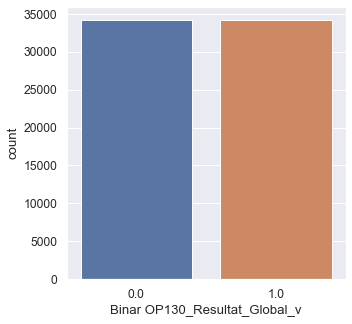

In [72]:
plt.figure(figsize=(5, 5))
sns.countplot(Const.Binar_OP130_Resultat_Global_v, data=oversampled_XY)

#### <u>d - Matrice de correlation et heatmap du nouveau dataset:</u>

In [73]:
# 3 - Correlation entre la target "Binar OP130_Resultat_Global_v" et les autres attributs
corr_matrix_oversampled = oversampled_XY.corr()
corr_matrix_oversampled[Const.Binar_OP130_Resultat_Global_v].sort_values(ascending=False)
    

Binar OP130_Resultat_Global_v      1.000000
OP100_Capuchon_insertion_mesure    0.229819
OP090_SnapRingFinalStroke_value    0.099822
OP090_SnapRingMidPointForce_val    0.083845
OP090_StartLinePeakForce_value     0.061239
OP120_Rodage_I_mesure_value        0.024506
OP110_Vissage_M8_angle_value       0.000205
OP110_Vissage_M8_torque_value     -0.012686
OP070_V_2_angle_value             -0.025901
OP090_SnapRingPeakForce_value     -0.049015
OP120_Rodage_U_mesure_value       -0.064017
OP070_V_1_angle_value             -0.076841
OP070_V_1_torque_value            -0.210033
OP070_V_2_torque_value            -0.217814
Name: Binar OP130_Resultat_Global_v, dtype: float64

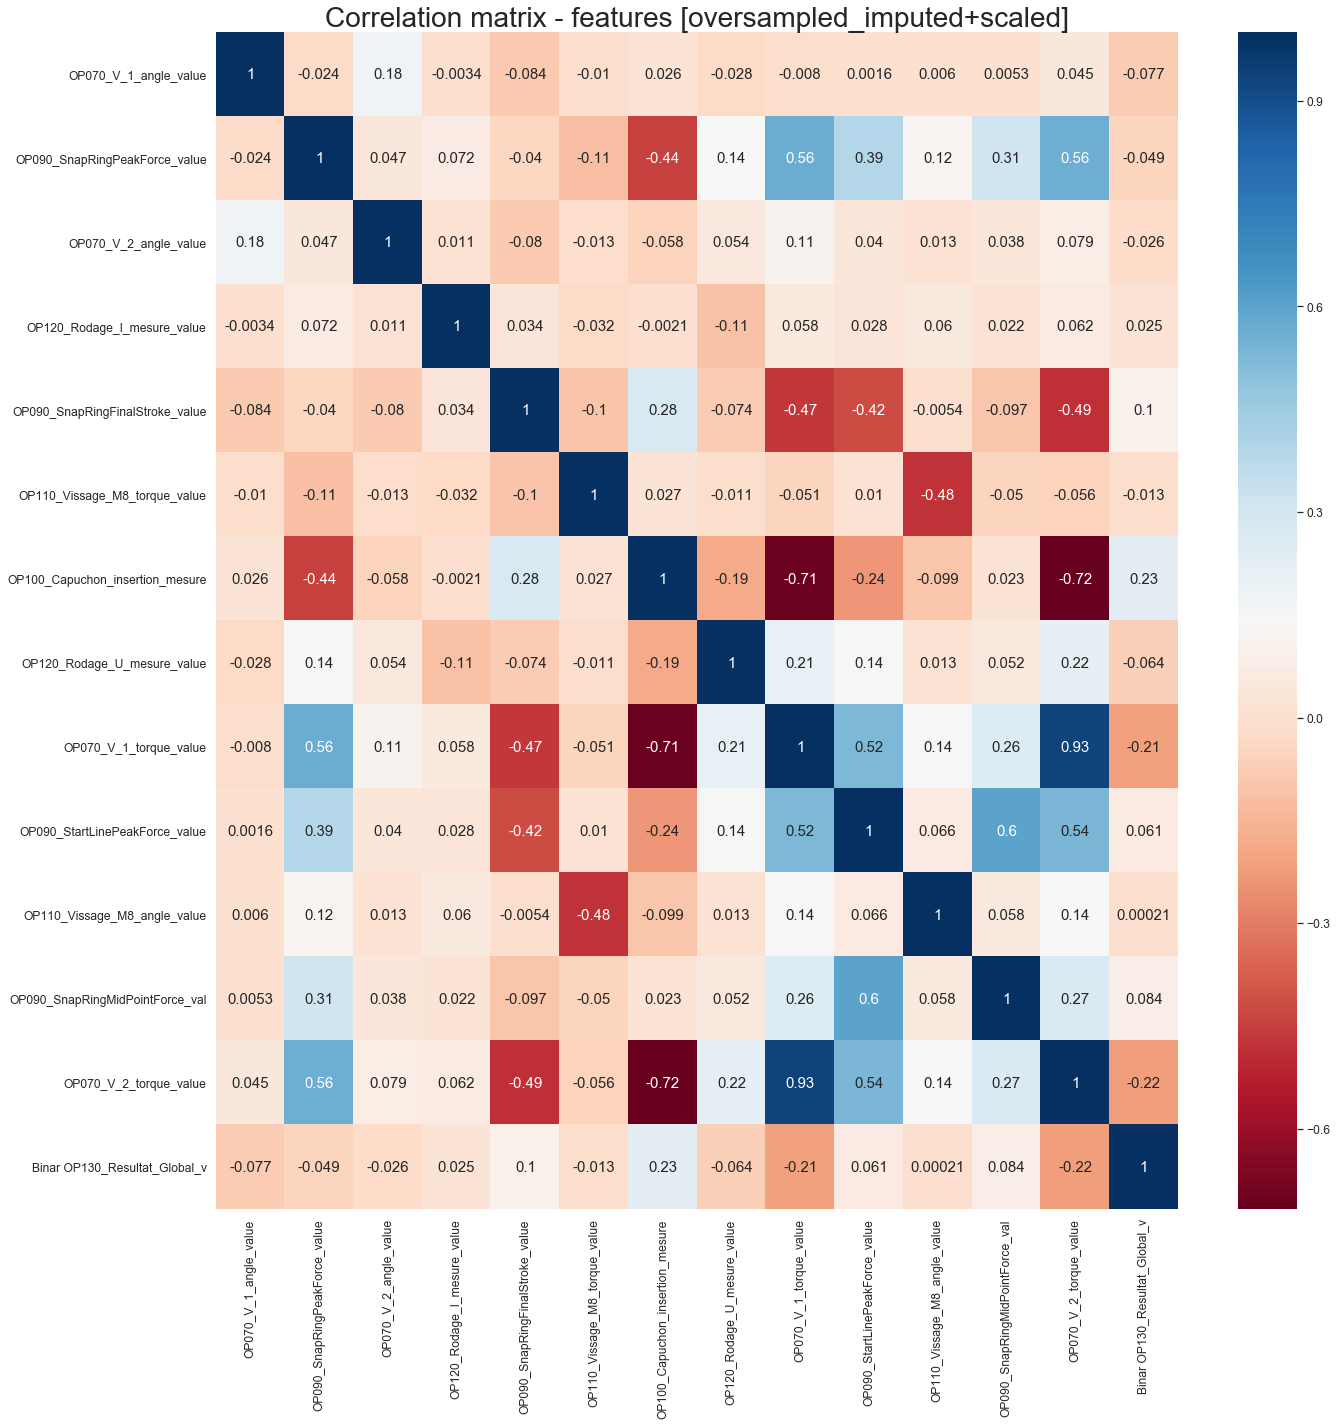

In [74]:
# 4 - Dessiner la Heatmap
ImgUtil.save_df_heatmap_plot(corr_matrix_oversampled,title.format('oversampled_imputed+scaled'))

#### e - Violon et boîte à moustaches des features du nouveau dataset:

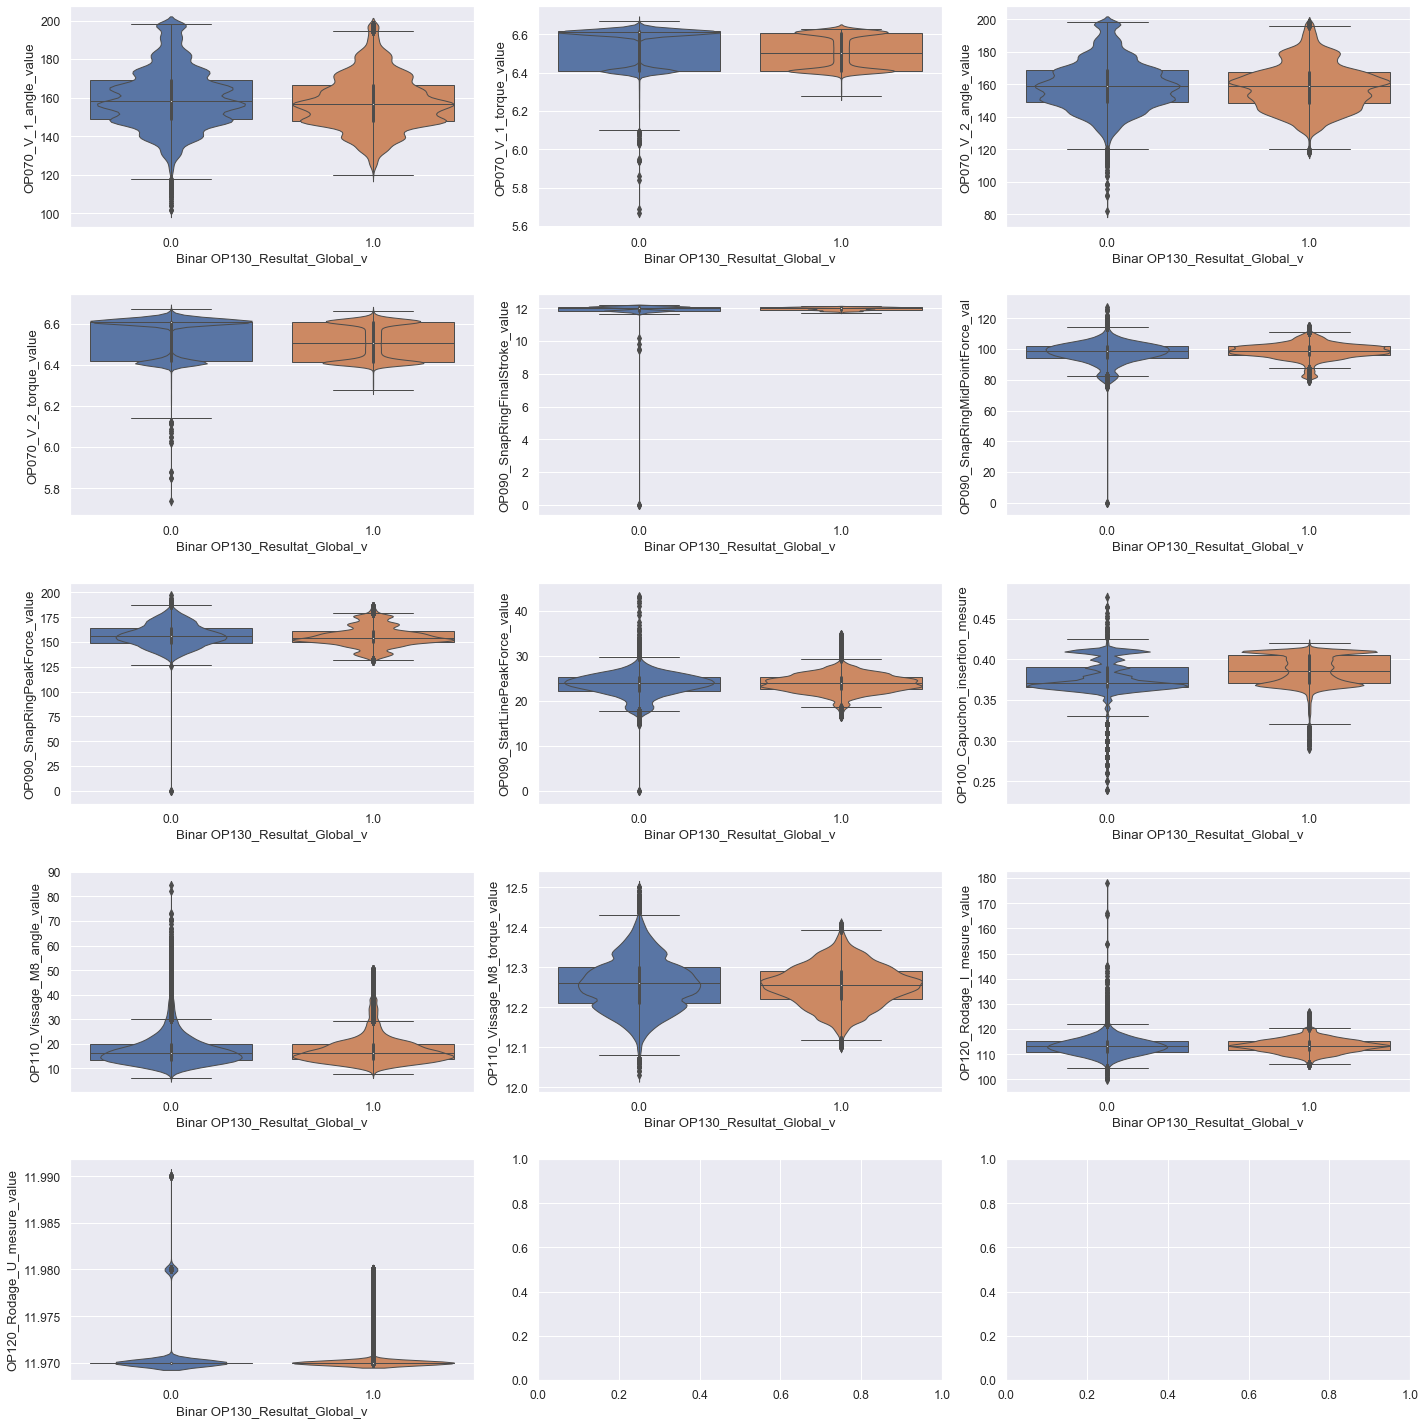

In [42]:
ImgUtil.save_df_XY_violin_plot(oversampled_XY, Const.Binar_OP130_Resultat_Global_v, 'XY_oversampled_data_distribution', 3)

###### <u>f - Ratio d'observations ayant des features en outlier du nouveau dataset:</u>

In [43]:
Q1 = oversampled_X.quantile(0.25)
Q3 = oversampled_X.quantile(0.75)
IQR = Q3 - Q1
#
outliers = ((oversampled_X < (Q1 - 1.5 * IQR)) |(oversampled_X > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Le ratio d'outlier est de {len(oversampled_X[outliers].index)/len(oversampled_X.index)}")

Le ratio d'outlier est de 0.2762496346097632


In [44]:
Q1 = oversampled_scaled_X.quantile(0.25)
Q3 = oversampled_scaled_X.quantile(0.75)
IQR = Q3 - Q1
#
outliers = ((oversampled_scaled_X < (Q1 - 1.5 * IQR)) |(oversampled_scaled_X > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Le ratio d'outlier est de {len(oversampled_scaled_X[outliers].index)/len(oversampled_scaled_X.index)}")

Le ratio d'outlier est de 0.2477491961414791


Le nombre d'outlier est considérable, à peu près 25% des données => On ne peut pas supprimer les observation

## 11 - Modèle à base d'arbre : Balanced Random Forest Classifier:
#### Premier modèle et première prédiction:
#### <u>Essayons un jet de données:</u>

0 -> preprocessor / ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_thresho
1 -> classifier / BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_we
- Model score: 0.9886485433109228
- Accuracy score: 0.9886485433109228
- Balanced accuracy score: 0.9886485433109228 / The balanced accuracy to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
- Average_precision_score: 0.9806379114533667
- Precision_score: 0.9836065573770492
- Recall score: 0.9938614440222158
- Roc_auc_score: 0.9886485433109228
- F1 score: 0.9887074104589735
- [10093   170]/[   63 10200] - P:0.9836 - R:0.9939 - roc_auc:0.9886 - f1:0.9887
- [[10093   170]
 [   63 10200]]
- classification_report_imbalanced:
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.99      0.98      0.99      0.99      0.99      0.98     10263
        1.0       0.98      0.99      0.98      0.99      0.99      0.98     10

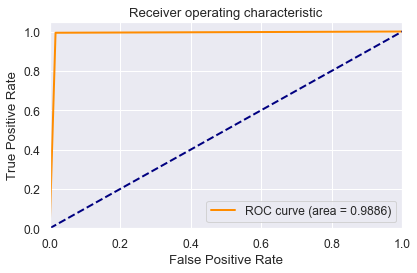

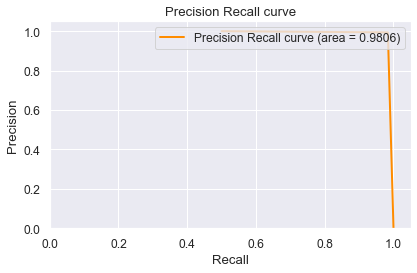

In [45]:

# 2 - ValeoPredictor & ValeoModeler
pred = ValeoPredictor()

# #2.a - Fit and predict on X_train, X_test
X_train, X_test, y_train, y_test = train_test_split(oversampled_scaled_X, oversampled_scaled_Y, test_size=0.3, random_state=48, stratify=oversampled_scaled_Y)  # shuffle=True,
   #pred.fit(X_train, y_train, [ValeoModeler.BRFC])
fitted_model = pred.fit_and_plot(X_train, y_train, X_test, y_test, [ValeoModeler.BRFC])

# #3 - Test suning ENS data
X_ens = DfUtil.read_csv([Const.rootDataTest() , "testinputs.csv"])
y_ens = fitted_model.predict(X_ens.drop(columns=[Const.PROC_TRACEINFO]))
DfUtil.write_y_csv(X_ens[Const.PROC_TRACEINFO], y_ens, Const.Binar_OP130_Resultat_Global_v, [Const.rootDataTest() , "testoutput.csv"])

In [81]:
# 2 - ValeoPredictor & ValeoModeler
pred = ValeoPredictor()

# 2.c - Fit using CV
fitted_model, cv_results = pred.fit_cv(oversampled_scaled_X, oversampled_scaled_Y, [ValeoModeler.XGBC])

0 -> preprocessor / ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_thresho
1 -> classifier / XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
 


C:\envdev\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\envdev\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\envdev\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\envdev\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\envdev\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


fit_time : [27.66604781 27.70999455 28.9150033  28.99995399 28.3229897 ]
score_time : [0.60495114 0.58097148 0.60299492 0.52400208 0.70996785]
test_f1 : [0.97890171 0.9868032  0.98808578 0.98467074 0.98743864]
train_f1 : [0.99686749 0.99375454 0.99525429 0.99346595 0.99355612]
test_f1_micro : [0.9790266  0.98662672 0.98794212 0.98443438 0.98728442]
train_f1_micro : [0.99685764 0.99371529 0.99523166 0.99342298 0.99351432]
test_f1_macro : [0.97902587 0.98662433 0.98794037 0.98443067 0.9872825 ]
train_f1_macro : [0.99685761 0.99371504 0.99523155 0.99342269 0.99351405]
test_f1_weighted : [0.97902587 0.98662433 0.98794037 0.98443067 0.9872825 ]
train_f1_weighted : [0.99685761 0.99371504 0.99523155 0.99342269 0.99351405]
test_recall : [0.97310728 1.         1.         0.99985384 0.99956153]
train_recall : [1. 1. 1. 1. 1.]
test_precision : [0.98476557 0.97395018 0.97645212 0.96994187 0.97560628]
train_precision : [0.99375454 0.98758661 0.9905534  0.98701673 0.98719475]
test_average_precision 

In [46]:
# 2 - ValeoPredictor & ValeoModeler
pred = ValeoPredictor()

# 2.b - Fit using GridSearchCV
pred.fit_cv_grid_search(oversampled_scaled_X, oversampled_scaled_Y, [ValeoModeler.BRFC])

0 -> preprocessor / ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_thresho
1 -> classifier / BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_we


C:\envdev\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Best Estimator: Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('transformers_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('nan_imputer',
                                                                   IterativeImputer(add_indicator=True,
                                                                                    estimator=BayesianRidge(alpha_1=1e-06,
                                                                                                            alpha_2=1e-06,
                                                                                                            alpha_init=None,
                                  

2020-04-09 15:26:01,840 - DEBUG - valeo.infrastructure.tools.ImgUtil - Saving figure 'Result_vs_OP070_V2_torque_value_20x5'


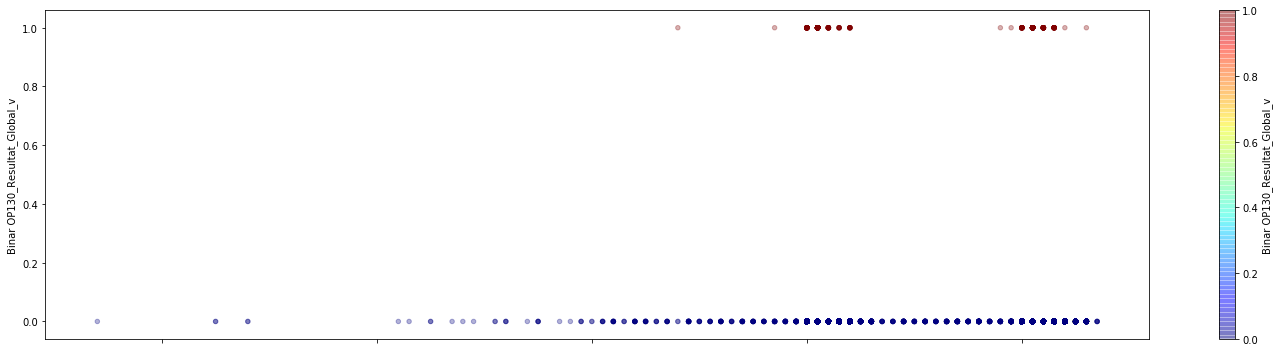

In [26]:
XY_data_transformed.plot(kind="scatter", x="OP070_V_2_torque_value", y = "Binar OP130_Resultat_Global_v", 
              c="Binar OP130_Resultat_Global_v", cmap=plt.get_cmap("jet"), colorbar = True,
              figsize=(20,5),
              alpha=0.3)
ImgUtil.save_fig("Result_vs_OP070_V2_torque_value_20x5")

2020-04-09 15:26:04,655 - DEBUG - valeo.infrastructure.tools.ImgUtil - Saving figure 'Result_vs_OP070_V1_torque_value_20x5'


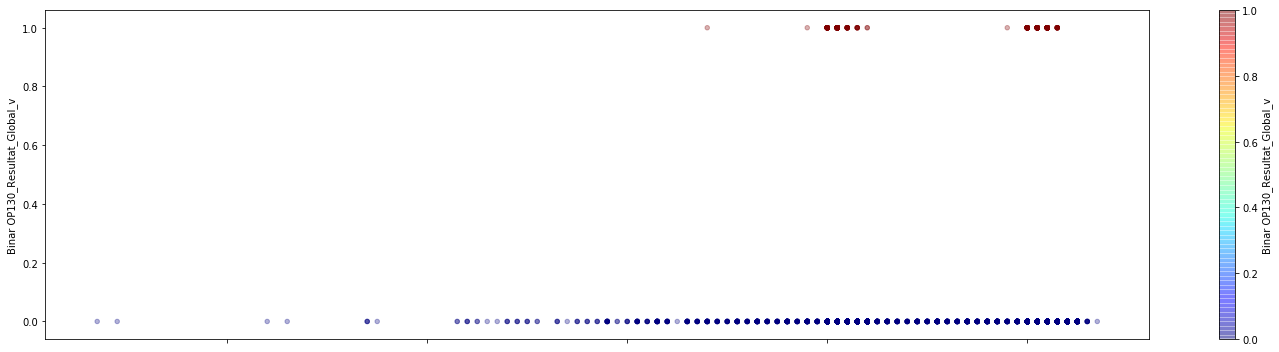

In [27]:
XY_data_transformed.plot(kind="scatter", x="OP070_V_1_torque_value", y = "Binar OP130_Resultat_Global_v", 
              c="Binar OP130_Resultat_Global_v", cmap=plt.get_cmap("jet"), colorbar = True,
              figsize=(20,5),
              alpha=0.3)
ImgUtil.save_fig("Result_vs_OP070_V1_torque_value_20x5")

In [16]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(XY_data_transformed)
# profile.to_file(os.path.join(Const.rootProject(),"valeo-profile.html" ))
